
ENV INFO
Python: 3.11.13
numpy : 2.1.2
pandas: 2.3.3
sklearn: 1.7.2
torch : 2.8.0+cu128
cuda available: True
cuda device: NVIDIA GeForce RTX 5090
pytorch-lightning: 2.5.6
neuralforecast: 3.1.2
lightgbm installed: True
lightgbm: 4.6.0


===== NBEATSx PIPELINE START =====
RUN_ID=20260127_192117
MODEL=nbeatsx_day_ahead | H=96 | INPUT_SIZE=1
DAYLIGHT_WEIGHT=3.0 (dup series + masked loss)
STACK_TYPES=['exogenous', 'identity', 'trend', 'seasonality']  <-- exogenous enabled
POSTPROCESS: clip_negative=True night_zero=True capacity_kw=None
TRAINING: lr=0.0005 max_steps=9000 batch=64
RESIDUAL: enabled=True use_oof=True folds=3 day_only=True alpha_min=0.03
Akima interpolation hourly → 15-min for column: pressure_msl
Akima interpolation hourly → 15-min for column: surface_pressure
Akima interpolation hourly → 15-min for column: cloud_cover
Akima interpolation hourly → 15-min for column: cloud_cover_low
Akima interpolation hourly → 15-min for column: cloud_cover_mid
Akima interpolation hourly → 15

Seed set to 42


train_df_nf shape: (303804, 8)
unique_ids: 3132
rows per series: 97

===== Training NBEATSx (FULL) =====


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_steps=9000` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[Train] NBEATSx finished. elapsed=196.0s | max_steps=9000 | batch=64 | lr=0.0005

===== Predicting VAL =====

===== Predicting TEST =====


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



===== METRICS (BASE NBEATSx, POSTPROCESSED) =====
nbeatsx_day_ahead VAL metrics (ORIGINAL scale, POST-PROCESSED):
  [ALL ] RMSE=12.52 | MAE=5.78 | R²=0.883
  [DAY ] RMSE=16.30 | MAE=9.79 | R²=0.794

nbeatsx_day_ahead TEST metrics (ORIGINAL scale, POST-PROCESSED):
  [ALL ] RMSE=9.73 | MAE=4.13 | R²=0.916
  [DAY ] RMSE=13.83 | MAE=8.33 | R²=0.837

===== RESIDUAL OOF TRAINING (LightGBM) =====
[OOF] folds constructed: 2 (requested=3)
[OOF] Fold 1: train_days=348 | oof_days=348


Seed set to 42
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_steps=4500` reached.


[Train] NBEATSx finished. elapsed=99.3s | max_steps=4500 | batch=64 | lr=0.0006


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[OOF] Fold 2: train_days=696 | oof_days=348


Seed set to 42
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_steps=4500` reached.


[Train] NBEATSx finished. elapsed=100.2s | max_steps=4500 | batch=64 | lr=0.0006


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[OOF] Residual training rows: 33916 | features: 10 | day_only=True
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1478
[LightGBM] [Info] Number of data points in the train set: 33916, number of used features: 9
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Info] Start training from score 0.333311
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[Saved] Residual model -> C:\Users\Admin\Desktop\Vedat\day_ahead_nbeatsx_outputs\artifacts\residual_lgbm.joblib
[Saved] Residual meta  -> C:\Users\Admin\Desktop\Vedat\day_ahead_nbeatsx_outputs\artifacts\residual_meta.json

===== METRICS (NBEATSx + Residual, POSTPROCESSED) =====
nbeatsx_day_ahead+Residual VAL:
  [ALL ] RMSE=12.28 | MAE=5.46 | R²=0.887
  [DAY ] RMSE=15.98 | MAE=9.25 | R²=0.802

nbeatsx_day_ahead+Residual TEST:
  [ALL ] RMSE=9.71 | MAE=3.95 | R²=0.916
  [DAY ] RMSE=13.80 | MAE=7.97 | R²=0.837

[Saved] Daily TEST metrics (base)  -> C:\Users\Admin\Desktop\Vedat\day_ahead_nbeatsx_outputs\metrics_daily_test_base.csv
[Saved] Daily TEST metrics (final) -> C:\Users\Admin\Desktop\Vedat\day_ahead_nbeatsx_outputs\metrics_daily_test_final.csv
[Saved] Overall metrics -> C:\Users\Admin\Desktop\Vedat\day_ahead_nbeatsx_outputs\metrics_overall.csv
[Saved] Run referenc

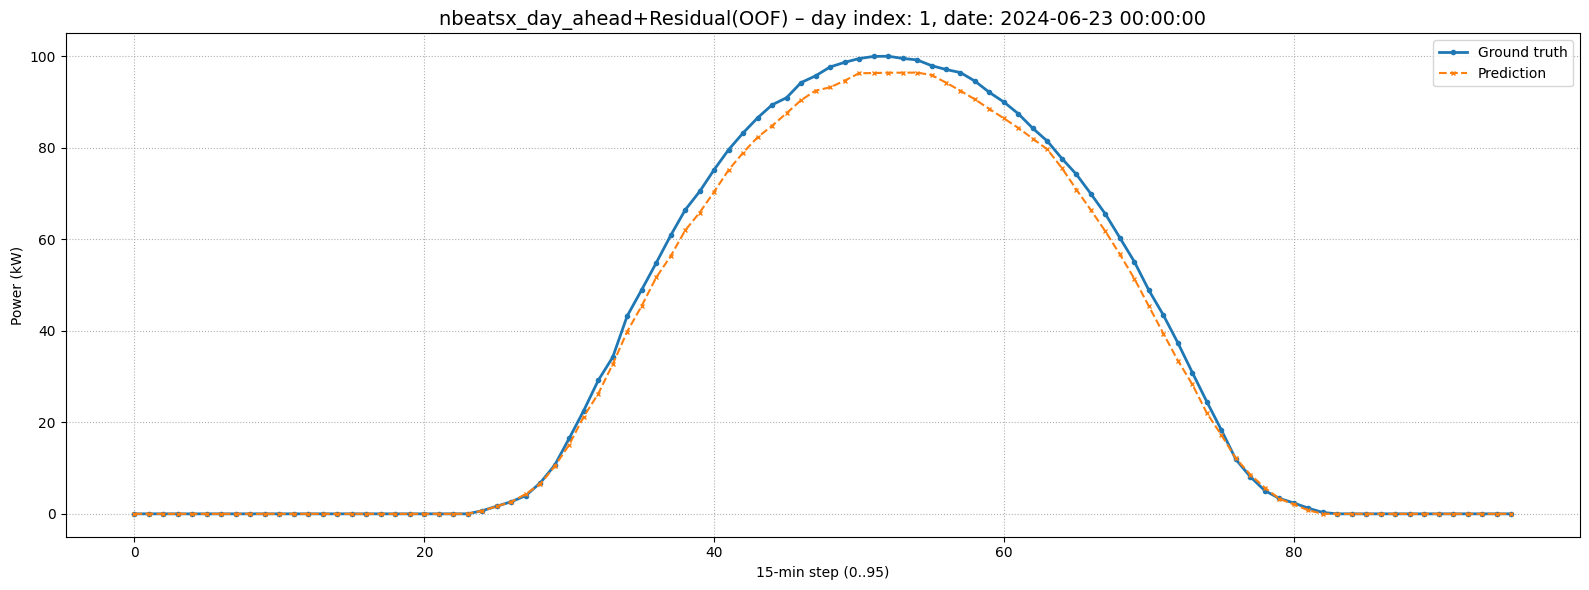


===== FINISHED =====


In [39]:

# ============================================================
# NBEATSx (NeuralForecast) – DAY-AHEAD (96 → 96) + Residual Model
# Pipeline: Kod1 (day-based, meteo-only, deploy-safe, fairness weighting)
# Residual: Kod2 mantığı (LightGBM), ancak GENELLEME odaklı iyileştirmeler:
#   - Out-of-fold (OOF) residual training (time-aware folds) -> leakage azaltır
#   - Alpha shrink (VAL üzerinde) + corr gate -> aşırı düzeltmeyi önler
#   - Residual features: selected meteo + deploy-safe time/cs_index/is_day + y_pred_base
#
# Tested environment (user log): Python 3.11, neuralforecast 3.1.2, torch 2.8, PL 2.5.6
#
# Requirements:
#   pip install neuralforecast torch pytorch-lightning lightgbm scikit-learn scipy joblib
# ============================================================

import os
import json
import random
import warnings
from datetime import datetime
import time
import inspect
from typing import List, Tuple, Dict, Optional

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.interpolate import Akima1DInterpolator
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib

warnings.filterwarnings("ignore")
plt.style.use("default")

# -------------------------
# NeuralForecast imports
# -------------------------
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATSx

import torch
import torch.nn as nn

# -------------------------
# Residual model (LightGBM)
# -------------------------
try:
    import lightgbm as lgb
    LGB_AVAILABLE = True
except Exception:
    LGB_AVAILABLE = False


# ============================================================
# 0) GLOBAL SETTINGS
# ============================================================

GLOBAL_SEED = 42
np.random.seed(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
torch.manual_seed(GLOBAL_SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(GLOBAL_SEED)

# --- File paths ------------------------------------------------------
PWR_PATH    = r"C:\Users\Admin\Desktop\Vedat\ds_new2.xlsx"
MET_PATH    = r"C:\Users\Admin\Desktop\Vedat\open-meteo_v2.xlsx"
HOURLY_PATH = r"C:\Users\Admin\Desktop\Vedat\python_trials_new\hourly_data\hourly_data_v2.csv"

# Output directory
OUT_DIR = r"C:\Users\Admin\Desktop\Vedat\day_ahead_nbeatsx_outputs"
os.makedirs(OUT_DIR, exist_ok=True)

MODEL_DIR = os.path.join(OUT_DIR, "models")
os.makedirs(MODEL_DIR, exist_ok=True)

ARTIFACT_DIR = os.path.join(OUT_DIR, "artifacts")
os.makedirs(ARTIFACT_DIR, exist_ok=True)

# --- Timezone and column settings -----------------------------------
TZ_LOCAL   = "Europe/Istanbul"
TARGET_TR  = "Toplam Aktif Güç(kW)"
TARGET_COL = "ActivePower_kW"

# GHI candidates
GHI_CANDIDATES = [
    "shortwave_radiation (W/m²)",
    "global_tilted_irradiance (W/m²)",
    "direct_radiation (W/m²)",
]

# --- Day-level cleaning flags ---------------------------------------
ENABLE_DAILY_GAP_CLEANING = False
DAILY_NA_THRESHOLD        = 0.20
MAX_INTERPOLATION_GAP     = 4
EXPECTED_STEPS_PER_DAY    = 96

# --- Train/Val/Test ratios (by day) ---------------------------------
TRAIN_RATIO = 0.80
VAL_RATIO   = 0.05

# ============================================================
# FEATURE SELECTION (Two-stage: Relevance -> Clustering)
# ============================================================
# Performans için 10 önerilir; isterseniz 5'e çekebilirsiniz.
TOP_K_FEATS = 5

MIN_ABS_CORR_TO_TARGET = 0.15
PRESELECT_TOP_N = 5 * TOP_K_FEATS

FS_THRESHOLDS = np.unique(np.concatenate([
    np.arange(0.001, 0.021, 0.001),
    np.arange(0.02,  0.101, 0.005),
    np.arange(0.10,  0.51,  0.05),
]))

# ============================================================
# FAIRNESS: DAYLIGHT WEIGHTING (Kod1 ile simetrik)
# ============================================================

DAYLIGHT_WEIGHT = 3.0
Y_SENTINEL      = -9999.0  # NF forbids NaN in y

# ============================================================
# DEPLOY-LIKE POSTPROCESS (Kod1/Kod2 ile aynı)
# ============================================================

CLIP_NEGATIVE = True
NIGHT_ZERO    = True
REPORT_DAYLIGHT_METRICS = True

# Opsiyonel kapasite kırpma (biliniyorsa açın)
CAPACITY_KW = None  # örn. 5000.0

# ============================================================
# NBEATSx SETTINGS (stabil + exogenous stack enabled)
# ============================================================

MODEL_NAME = "nbeatsx_day_ahead"
HORIZON_H  = 96
NF_FREQ    = "15min"

# deploy-safe minimal history (y yok)
INPUT_SIZE = 1

LEARNING_RATE = 5e-4
MAX_STEPS     = 9000   # base'i biraz güçlendirdik
BATCH_SIZE    = 64

# Critical improvement: EXOG stack enabled
STACK_TYPES = ["exogenous", "identity", "trend", "seasonality"]
N_BLOCKS    = [4, 2, 2, 2]

# !!! Stabilite: tüm stack'lerde aynı MLP (shape mismatch önlenir)
MLP_UNITS_BASE = [1024, 1024, 512]
MLP_UNITS      = [list(MLP_UNITS_BASE) for _ in STACK_TYPES]

DROPOUT_PROB_THETA = 0.15
SHARED_WEIGHTS     = False
N_HARMONICS        = 24
N_POLYNOMIALS      = 3
NUM_LR_DECAYS      = 3

# Reduce Lightning verbosity
PL_ENABLE_PROGRESS_BAR   = False
PL_ENABLE_CHECKPOINTING  = False
PL_ENABLE_MODEL_SUMMARY  = False
PL_LOGGER                = False

PL_GRAD_CLIP_VAL         = 1.0

# ============================================================
# RESIDUAL MODEL SETTINGS (Kod2 mantığı + genelleme iyileştirmeleri)
# ============================================================

ENABLE_RESIDUAL_MODEL = True
RESIDUAL_MODEL_KIND   = "lgbm"     # "lgbm" (tek seçenek)
RESIDUAL_DAY_ONLY     = True       # sadece gündüz noktaları ile öğren ve uygula
RESIDUAL_USE_DAYLIGHT_WEIGHTS = False  # isterseniz True (daylight weighting) - genelde gerek yok

# OOF residual training (leakage azaltır). True önerilir.
RESIDUAL_USE_OOF = True
RESIDUAL_OOF_FOLDS = 3             # 3 iyi denge; 4 daha pahalı

# OOF base training steps (compute azaltmak için)
OOF_MAX_STEPS = 4500               # her fold için
OOF_BATCH_SIZE = 64
OOF_LR = 6e-4

# Alpha shrink + gate
ALPHA_MIN_TO_APPLY = 0.03          # 0.03–0.10 arası deneyebilirsiniz
ALPHA_CLIP_LOW  = 0.0
ALPHA_CLIP_HIGH = 1.0
ALPHA_EPS = 1e-9
RESIDUAL_MIN_CORR = 0.05           # val corr düşükse residual'ı kapat

# LightGBM params (genelleme odaklı; çok agresif değil)
LGB_PARAMS = dict(
    objective="regression_l1",     # MAE odaklı daha robust
    num_leaves=64,
    max_depth=7,
    learning_rate=0.03,
    n_estimators=3000,
    subsample=0.8,
    subsample_freq=1,
    colsample_bytree=0.8,
    reg_lambda=0.5,
    reg_alpha=0.0,
    min_data_in_leaf=80,
    random_state=GLOBAL_SEED,
    n_jobs=-1
)
LGB_EARLY_STOPPING_ROUNDS = 150

# ============================================================
# 0a) SMALL HELPERS
# ============================================================

def print_env_info():
    try:
        import pytorch_lightning as pl
        pl_ver = pl.__version__
    except Exception:
        pl_ver = "unknown"

    print("\n======================================")
    print("ENV INFO")
    print("======================================")
    print("Python:", os.sys.version.split()[0])
    print("numpy :", np.__version__)
    print("pandas:", pd.__version__)
    print("sklearn:", __import__("sklearn").__version__)
    print("torch :", torch.__version__)
    print("cuda available:", torch.cuda.is_available())
    if torch.cuda.is_available():
        try:
            print("cuda device:", torch.cuda.get_device_name(0))
        except Exception:
            pass
    print("pytorch-lightning:", pl_ver)
    try:
        import neuralforecast
        print("neuralforecast:", neuralforecast.__version__)
    except Exception:
        print("neuralforecast: unknown")
    print("lightgbm installed:", LGB_AVAILABLE)
    if LGB_AVAILABLE:
        import lightgbm
        print("lightgbm:", lightgbm.__version__)
    print("======================================\n")


def _filter_trainer_kwargs(kwargs: dict) -> dict:
    """Filter to pytorch_lightning.Trainer signature to avoid version mismatch."""
    try:
        import pytorch_lightning as pl
        sig = inspect.signature(pl.Trainer.__init__)
        allowed = set(sig.parameters.keys())
        return {k: v for k, v in kwargs.items() if k in allowed}
    except Exception:
        return kwargs


def _filter_model_explicit_kwargs(model_cls, kwargs: dict) -> dict:
    """
    Keep only explicit parameters from model __init__ (exclude **kwargs),
    to avoid forwarding unknown keys and silently changing behavior.
    """
    sig = inspect.signature(model_cls.__init__)
    explicit = {name for name, p in sig.parameters.items()
                if name != "self" and p.kind != p.VAR_KEYWORD}
    return {k: v for k, v in kwargs.items() if k in explicit}


def _warn_if_non_integer_daylight_weight(w):
    if abs(float(w) - round(float(w))) > 1e-9:
        print(f"[Warning] DAYLIGHT_WEIGHT={w} is not integer; duplication will approximate via rounding.")
    return int(round(float(w)))


def make_synthetic_ds(input_size: int, h: int, freq_minutes: int = 15,
                      base: str = "2000-01-01 00:00:00"):
    """
    Synthetic ds grid:
      - history ends at base - freq
      - future starts at base (t=0..h-1)
    """
    if input_size < 1:
        raise ValueError("input_size must be >= 1")

    base_ts = pd.Timestamp(base)
    hist_end = base_ts - pd.Timedelta(minutes=freq_minutes)
    ds_hist = [hist_end - pd.Timedelta(minutes=freq_minutes * (input_size - 1 - i))
               for i in range(input_size)]
    ds_futr = [base_ts + pd.Timedelta(minutes=freq_minutes * t) for t in range(h)]
    return ds_hist, ds_futr


# ============================================================
# 1) DATA LOADING, AKIMA INTERPOLATION, TIMEZONE ALIGNMENT
# ============================================================

def akima_interpolate_series(time_old, values_old, time_new):
    values_old = np.asarray(values_old, dtype=float)
    mask = ~np.isnan(values_old)
    time_old_clean = np.asarray(time_old)[mask]
    values_old_clean = values_old[mask]

    x_old = time_old_clean.astype("datetime64[ns]").astype(np.int64)
    x_new = np.asarray(time_new).astype("datetime64[ns]").astype(np.int64)

    if len(x_old) < 3:
        return np.interp(x_new, x_old, values_old_clean)

    f = Akima1DInterpolator(x_old, values_old_clean)
    return f(x_new)


def load_and_build_master_df():
    # --- Power (15-min) ---
    df_pwr = pd.read_excel(PWR_PATH)
    df_pwr["Zaman"] = pd.to_datetime(df_pwr["Zaman"])
    df_pwr.set_index("Zaman", inplace=True)
    df_pwr.sort_index(inplace=True)

    if TARGET_TR in df_pwr.columns:
        df_pwr = df_pwr.rename(columns={TARGET_TR: TARGET_COL})
    elif TARGET_COL not in df_pwr.columns:
        raise KeyError(f"Power column not found: {TARGET_TR} or {TARGET_COL}")

    # --- Meteo (15-min) ---
    df_met = pd.read_excel(MET_PATH)
    df_met["time"] = pd.to_datetime(df_met["time"])
    df_met.set_index("time", inplace=True)
    df_met.sort_index(inplace=True)

    # --- Hourly meteo ---
    df_hourly = pd.read_csv(HOURLY_PATH)
    if "time" not in df_hourly.columns:
        raise KeyError("'time' column not found in hourly CSV.")
    df_hourly["time"] = pd.to_datetime(df_hourly["time"])
    df_hourly.set_index("time", inplace=True)
    df_hourly.sort_index(inplace=True)

    hourly_cols = [
        "pressure_msl",
        "surface_pressure",
        "cloud_cover",
        "cloud_cover_low",
        "cloud_cover_mid",
        "cloud_cover_high",
        "vapour_pressure_deficit",
    ]
    for c in hourly_cols:
        if c not in df_hourly.columns:
            print(f"[Warning] Hourly column missing: {c}")
    hourly_df = df_hourly[[c for c in hourly_cols if c in df_hourly.columns]].copy()

    # --- Hourly -> 15-min via Akima ---
    target_index = df_met.index.sort_values().unique()
    df_hourly_15 = pd.DataFrame(index=target_index)
    for col in hourly_df.columns:
        print(f"Akima interpolation hourly → 15-min for column: {col}")
        df_hourly_15[col] = akima_interpolate_series(
            hourly_df.index.values,
            hourly_df[col].values,
            target_index.values
        )

    # --- Timezone alignment ---
    df_met.index = df_met.index.tz_localize("UTC").tz_convert(TZ_LOCAL).tz_localize(None)
    df_hourly_15.index = df_hourly_15.index.tz_localize("UTC").tz_convert(TZ_LOCAL).tz_localize(None)
    df_pwr.index = df_pwr.index.tz_localize(TZ_LOCAL).tz_convert(TZ_LOCAL).tz_localize(None)

    # --- Join ---
    df = (
        df_met.join(df_hourly_15, how="inner")
              .join(df_pwr[[TARGET_COL]], how="inner")
              .sort_index()
    )

    # Optional drop
    first_day_to_drop = pd.to_datetime("2021-03-24").date()
    df = df[df.index.date != first_day_to_drop]

    # Determine GHI column
    ghi_col = None
    for c in GHI_CANDIDATES:
        if c in df.columns:
            ghi_col = c
            break
    if ghi_col is None:
        raise KeyError(f"No GHI-like column found among {GHI_CANDIDATES}")

    # Create 'is_day' if missing
    if "is_day" not in df.columns:
        df["is_day"] = (df[ghi_col] > 0).astype(int)

    # Add 'day' column
    df["day"] = df.index.normalize()

    print("Master DF shape:", df.shape)
    return df, ghi_col


# ============================================================
# 2) DAY-LEVEL CLEANING
# ============================================================

def clean_days_with_power_gaps(
    df,
    power_col=TARGET_COL,
    enable_gap_cleaning=ENABLE_DAILY_GAP_CLEANING,
    daily_na_threshold=DAILY_NA_THRESHOLD,
    max_interp_gap=MAX_INTERPOLATION_GAP,
    expected_steps_per_day=EXPECTED_STEPS_PER_DAY,
):
    keep_groups = []
    removed_days = []

    for day, g in df.groupby("day"):
        g = g.sort_index().copy()
        y = g[power_col].astype(float)

        if len(g) != expected_steps_per_day:
            removed_days.append((day, "wrong_length", len(g)))
            continue

        zero_ratio = (y == 0).mean()
        if zero_ratio > 0.80:
            removed_days.append((day, "too_many_zeros", float(zero_ratio)))
            continue

        na_ratio = y.isna().mean()
        if not enable_gap_cleaning:
            if na_ratio > 0.0:
                removed_days.append((day, "has_nan_no_cleaning", float(na_ratio)))
                continue
        else:
            if na_ratio > daily_na_threshold:
                removed_days.append((day, "na_ratio_too_high", float(na_ratio)))
                continue

            y_interp = y.interpolate(limit=max_interp_gap, limit_direction="both")
            if y_interp.isna().any():
                removed_days.append((day, "nan_after_interp", float(y_interp.isna().mean())))
                continue
            g[power_col] = y_interp

        keep_groups.append(g)

    if not keep_groups:
        raise RuntimeError("No valid days left after cleaning. Check thresholds.")

    df_clean = pd.concat(keep_groups).sort_index()
    print(f"Remaining days after cleaning: {df_clean['day'].nunique()}")
    print(f"Removed days: {len(removed_days)}")
    return df_clean, removed_days


# # ============================================================
# # 2b) FEATURE ENGINEERING (METEO-ONLY; DEPLOY-SAFE)
# # ============================================================

# def add_feature_engineering_meteo_only(df, ghi_col):
#     df = df.copy()
#     idx = df.index

#     if "day" not in df.columns:
#         df["day"] = idx.normalize()

#     if "is_day" not in df.columns:
#         if ghi_col not in df.columns:
#             found = None
#             for c in GHI_CANDIDATES:
#                 if c in df.columns:
#                     found = c
#                     break
#             if found is None:
#                 raise KeyError(f"Cannot build is_day: no ghi column found among {GHI_CANDIDATES}")
#             ghi_col = found
#         df["is_day"] = (df[ghi_col] > 0).astype(int)

#     doy = idx.dayofyear
#     df["doy_sin"] = np.sin(2 * np.pi * (doy / 365.0))
#     df["doy_cos"] = np.cos(2 * np.pi * (doy / 365.0))

#     minute_of_day = idx.hour * 60 + idx.minute
#     df["tod_sin"] = np.sin(2 * np.pi * (minute_of_day / 1440.0))
#     df["tod_cos"] = np.cos(2 * np.pi * (minute_of_day / 1440.0))

#     minutes = (idx - idx.normalize()) / pd.Timedelta(minutes=15)
#     df["slot"] = minutes.astype(int)

#     if ghi_col not in df.columns:
#         raise KeyError(f"ghi_col='{ghi_col}' not found in df for cs_index feature.")
#     ghi = df[ghi_col].astype(float)
#     daily_max_ghi = df.groupby("day")[ghi_col].transform("max").replace(0, np.nan)
#     cs_index = (ghi / daily_max_ghi).replace([np.inf, -np.inf], np.nan)
#     df["cs_index_dailymax"] = cs_index.clip(0, 5).fillna(0.0)

#     # --- Extra robust transforms (deploy-safe)
#     # Helps NBEATSx / residual capture nonlinearities without using target history.
#     if ghi_col in df.columns:
#         df["ghi_sqrt"] = np.sqrt(np.clip(df[ghi_col].astype(float), 0.0, None))
#         df["ghi_log1p"] = np.log1p(np.clip(df[ghi_col].astype(float), 0.0, None))
#     if "cloud_cover" in df.columns:
#         df["cloud_cover_sq"] = (df["cloud_cover"].astype(float) / 100.0) ** 2
#     if "temperature_2m (°C)" in df.columns and "relative_humidity_2m (%)" in df.columns:
#         # simple interaction
#         df["temp_x_rh"] = df["temperature_2m (°C)"].astype(float) * (df["relative_humidity_2m (%)"].astype(float) / 100.0)

#     return df

# ============================================================
# 2b) FEATURE ENGINEERING (METEO-ONLY; DEPLOY-SAFE; FAIR)
# Kod1/Kod2 ile aynı "fair" feature set:
#   - is_day
#   - doy_sin/cos, tod_sin/cos
#   - slot (0..95)
#   - cs_index_dailymax = GHI / daily max GHI
# Ek dönüşümler YOK: ghi_sqrt, ghi_log1p, cloud_cover_sq, temp_x_rh kaldırıldı.
# ============================================================

def add_feature_engineering_meteo_only(df, ghi_col):
    """
    Deploy-safe + fair:
      - Sadece meteoroloji ve timestamp'ten türetilen deterministic feature'lar.
      - Target'a veya target geçmişine bakan feature yok.
      - Nonlinear transform / interaction yok (Kod1/Kod2 ile simetrik).
    """
    df = df.copy()
    idx = df.index

    if "day" not in df.columns:
        df["day"] = idx.normalize()

    # Create 'is_day' if missing
    if "is_day" not in df.columns:
        if ghi_col not in df.columns:
            found = None
            for c in GHI_CANDIDATES:
                if c in df.columns:
                    found = c
                    break
            if found is None:
                raise KeyError(f"Cannot build is_day: no GHI column found among {GHI_CANDIDATES}")
            ghi_col = found
        df["is_day"] = (df[ghi_col] > 0).astype(int)

    # Day-of-year (cyclical)
    doy = idx.dayofyear
    df["doy_sin"] = np.sin(2 * np.pi * (doy / 365.0))
    df["doy_cos"] = np.cos(2 * np.pi * (doy / 365.0))

    # Time-of-day (cyclical)
    minute_of_day = idx.hour * 60 + idx.minute
    df["tod_sin"] = np.sin(2 * np.pi * (minute_of_day / 1440.0))
    df["tod_cos"] = np.cos(2 * np.pi * (minute_of_day / 1440.0))

    # Slot (0..95)
    minutes = (idx - idx.normalize()) / pd.Timedelta(minutes=15)
    df["slot"] = minutes.astype(int)

    # Clear-sky-like index: GHI / daily max GHI
    if ghi_col not in df.columns:
        raise KeyError(f"ghi_col='{ghi_col}' not found in df for cs_index feature.")
    ghi = df[ghi_col].astype(float)
    daily_max_ghi = df.groupby("day")[ghi_col].transform("max").replace(0, np.nan)
    cs_index = (ghi / daily_max_ghi).replace([np.inf, -np.inf], np.nan)
    df["cs_index_dailymax"] = cs_index.clip(0, 5).fillna(0.0)

    return df

# ============================================================
# 2c) FEATURE SELECTION (Two-stage)
# ============================================================

def compute_abs_target_corr(df, target_col, feature_cols) -> pd.Series:
    y = df[target_col].astype(float)
    scores = {}
    for c in feature_cols:
        x = df[c]
        if not np.issubdtype(x.dtype, np.number):
            continue
        x = pd.to_numeric(x, errors="coerce")
        corr = x.corr(y)
        if pd.isna(corr):
            continue
        scores[c] = float(abs(corr))
    if not scores:
        return pd.Series(dtype=float)
    return pd.Series(scores).sort_values(ascending=False)


def preselect_candidate_features(df, target_col, feature_cols,
                                 top_n=PRESELECT_TOP_N,
                                 min_abs_corr=MIN_ABS_CORR_TO_TARGET):
    s = compute_abs_target_corr(df, target_col, feature_cols)
    if len(s) == 0:
        return [], s
    if min_abs_corr is not None:
        s = s[s >= float(min_abs_corr)]
    if top_n is not None and len(s) > int(top_n):
        s = s.head(int(top_n))
    return s.index.tolist(), s


def build_distance_and_linkage(df, feature_cols):
    corr = df[feature_cols].corr().abs().fillna(0.0)
    distance = 1.0 - corr
    np.fill_diagonal(distance.values, 0.0)
    Z = linkage(squareform(distance.values), method="average")
    return distance, Z


def clusters_from_linkage(Z, threshold):
    return fcluster(Z, t=float(threshold), criterion="distance")


def select_reps_from_clusters(feature_cols, cluster_ids, target_corr_abs: pd.Series):
    cluster_table = pd.DataFrame({"feature": feature_cols, "cluster_id": cluster_ids})
    reps = []
    for cid in sorted(cluster_table["cluster_id"].unique()):
        members = cluster_table.loc[cluster_table["cluster_id"] == cid, "feature"].tolist()
        best_f = max(members, key=lambda f: float(target_corr_abs.get(f, 0.0)))
        reps.append(best_f)
    return reps, cluster_table


def auto_threshold_for_k(Z, thresholds, target_k, candidate_n):
    rows = []
    if candidate_n <= target_k:
        table = pd.DataFrame([{
            "threshold": None, "corr_limit": None, "n_clusters": int(candidate_n),
            "note": f"candidate_n({candidate_n}) <= target_k({target_k})"
        }])
        return None, table

    for th in thresholds:
        cl = clusters_from_linkage(Z, th)
        rows.append({
            "threshold": float(round(th, 6)),
            "corr_limit": float(round(1.0 - th, 6)),
            "n_clusters": int(len(np.unique(cl)))
        })
    table = pd.DataFrame(rows)

    feasible = table[table["n_clusters"] >= int(target_k)].copy()
    if len(feasible) == 0:
        best_row = table.sort_values(["n_clusters", "threshold"], ascending=[False, True]).iloc[0]
    else:
        feasible["err"] = feasible["n_clusters"] - int(target_k)
        best_row = feasible.sort_values(["err", "threshold"], ascending=[True, False]).iloc[0]

    return float(best_row["threshold"]), table


def two_stage_feature_selection(df_train, target_col, feature_cols_all,
                                top_k=TOP_K_FEATS,
                                preselect_top_n=PRESELECT_TOP_N,
                                min_abs_corr=MIN_ABS_CORR_TO_TARGET,
                                thresholds=FS_THRESHOLDS):
    candidates, rel_scores = preselect_candidate_features(
        df=df_train, target_col=target_col, feature_cols=feature_cols_all,
        top_n=preselect_top_n, min_abs_corr=min_abs_corr
    )
    if len(candidates) == 0:
        candidates, rel_scores = preselect_candidate_features(
            df=df_train, target_col=target_col, feature_cols=feature_cols_all,
            top_n=preselect_top_n, min_abs_corr=None
        )
    if len(candidates) == 0:
        raise RuntimeError("Feature selection failed: no numeric candidate features found with valid correlation.")

    if len(candidates) <= int(top_k):
        return candidates, {
            "candidates": candidates,
            "rel_scores": rel_scores,
            "best_threshold": None,
            "threshold_table": pd.DataFrame(),
            "cluster_table": pd.DataFrame()
        }

    target_corr_abs = compute_abs_target_corr(df_train, target_col, candidates).reindex(candidates).fillna(0.0)
    _, Z = build_distance_and_linkage(df_train, candidates)
    best_th, th_table = auto_threshold_for_k(Z, thresholds, int(top_k), len(candidates))

    cluster_ids = clusters_from_linkage(Z, best_th)
    reps, cluster_table = select_reps_from_clusters(candidates, cluster_ids, target_corr_abs)

    reps_sorted = sorted(reps, key=lambda f: float(target_corr_abs.get(f, 0.0)), reverse=True)
    final_feats = reps_sorted[:int(top_k)]

    if len(final_feats) < int(top_k):
        all_sorted = list(rel_scores.index)
        for f in all_sorted:
            if f not in final_feats:
                final_feats.append(f)
            if len(final_feats) == int(top_k):
                break

    return final_feats, {
        "candidates": candidates,
        "rel_scores": rel_scores,
        "best_threshold": best_th,
        "threshold_table": th_table,
        "cluster_table": cluster_table
    }


# ============================================================
# 3) TRAIN/VAL/TEST SPLIT BY DAY
# ============================================================

def split_days_train_val_test(df, train_ratio=TRAIN_RATIO, val_ratio=VAL_RATIO):
    unique_days = np.array(sorted(df["day"].unique()))
    n_days = len(unique_days)

    n_train = max(1, int(n_days * train_ratio))
    n_val   = max(1, int(n_days * val_ratio))

    days_train = unique_days[:n_train]
    days_val   = unique_days[n_train:n_train + n_val]
    days_test  = unique_days[n_train + n_val:]

    test_ratio = 1.0 - (train_ratio + val_ratio)

    print(f"Total days: {n_days}")
    print(f"Ratios -> Train: {train_ratio:.2f}, Val: {val_ratio:.2f}, Test: {test_ratio:.2f}")
    print(f"Split  -> Train days: {len(days_train)}, Val days: {len(days_val)}, Test days: {len(days_test)}")
    return days_train, days_val, days_test


# ============================================================
# 4) DAY-LEVEL DATASET CREATION (for scaling + eval)
# ============================================================

def create_day_level_dataset(df, feature_cols, target_col=TARGET_COL,
                             expected_steps=EXPECTED_STEPS_PER_DAY,
                             mask_col="is_day"):
    X_list, y_list, day_list, m_list = [], [], [], []

    for day, g in df.groupby("day"):
        g = g.sort_index()

        if len(g) != expected_steps:
            continue

        needed_cols = list(feature_cols) + [target_col]
        if g[needed_cols].isna().any().any():
            continue

        X = g[feature_cols].values.astype(np.float32)        # (96,F)
        y = g[[target_col]].values.astype(np.float32)        # (96,1)

        if mask_col in g.columns:
            m = g[mask_col].fillna(0).values.astype(np.float32).reshape(-1)  # (96,)
        else:
            m = np.ones((expected_steps,), dtype=np.float32)

        if len(m) != expected_steps:
            continue

        X_list.append(X)
        y_list.append(y)
        day_list.append(day)
        m_list.append(m)

    if not X_list:
        return None, None, None, None

    return (
        np.stack(X_list, axis=0),
        np.stack(y_list, axis=0),
        np.array(day_list),
        np.stack(m_list, axis=0),
    )


# ============================================================
# 5) METRICS + POSTPROCESS + PLOT
# ============================================================

def postprocess_predictions(y_pred_orig, is_day_mask=None,
                            clip_negative=True, night_zero=True, capacity_kw=None):
    y = np.array(y_pred_orig, copy=True)
    squeezed = False
    if y.ndim == 3 and y.shape[-1] == 1:
        y = y.squeeze(-1)
        squeezed = True

    if clip_negative:
        y = np.maximum(y, 0.0)

    if night_zero and is_day_mask is not None:
        night_mask = (np.asarray(is_day_mask).astype(int) == 0)
        y[night_mask] = 0.0

    if capacity_kw is not None:
        y = np.clip(y, 0.0, float(capacity_kw))

    if squeezed:
        y = y[..., np.newaxis]
    return y


def compute_overall_metrics(y_true, y_pred, mask=None):
    yt = np.asarray(y_true).reshape(-1)
    yp = np.asarray(y_pred).reshape(-1)

    if mask is not None:
        m = np.asarray(mask).reshape(-1).astype(bool)
        yt = yt[m]
        yp = yp[m]

    mse  = mean_squared_error(yt, yp)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(yt, yp)
    r2   = r2_score(yt, yp)

    return {"MSE": float(mse), "RMSE": float(rmse), "MAE": float(mae), "R2": float(r2)}


def compute_daily_metrics(day_array, Y_true, Y_pred):
    records = []
    unique_days = np.unique(day_array)
    for d in unique_days:
        idx = np.where(day_array == d)[0]
        y_t = np.asarray(Y_true)[idx].reshape(-1)
        y_p = np.asarray(Y_pred)[idx].reshape(-1)

        mse_d  = mean_squared_error(y_t, y_p)
        rmse_d = np.sqrt(mse_d)
        mae_d  = mean_absolute_error(y_t, y_p)
        r2_d   = r2_score(y_t, y_p)

        records.append({"day": d, "MSE": float(mse_d), "RMSE": float(rmse_d), "MAE": float(mae_d), "R2": float(r2_d)})

    return pd.DataFrame(records).set_index("day")


def plot_test_day(day_no, d_test, Y_test_orig, y_pred_post, title_prefix="Model"):
    if d_test is None or len(d_test) == 0:
        print("Empty set, nothing to plot.")
        return

    unique_days = np.unique(d_test)
    if day_no < 1 or day_no > len(unique_days):
        print(f"Invalid day_no={day_no}. There are {len(unique_days)} unique days.")
        return

    day_label = unique_days[day_no - 1]
    idxs = np.where(d_test == day_label)[0]
    if len(idxs) == 0:
        print(f"No sample found for day {day_label}.")
        return

    y_true = np.asarray(Y_test_orig)[idxs].reshape(-1)
    y_pred = np.asarray(y_pred_post)[idxs].reshape(-1)

    plt.figure(figsize=(16, 6))
    plt.plot(y_true, label="Ground truth", marker="o", ms=3, linewidth=2)
    plt.plot(y_pred, label="Prediction", linestyle="--", marker="x", ms=3)

    plt.title(f"{title_prefix} – day index: {day_no}, date: {day_label}", fontsize=14)
    plt.xlabel("15-min step (0..95)")
    plt.ylabel("Power (kW)")
    plt.grid(True, linestyle=":")
    plt.legend()
    plt.tight_layout()
    plt.show()


# ============================================================
# 6) CUSTOM LOSS (NeuralForecast compatible)
# ============================================================

def build_masked_huber_loss(y_sentinel=Y_SENTINEL, delta=1.0):
    """
    NeuralForecast uyumlu masked Huber loss:
      - y == sentinel olan noktalar loss'tan düşer (ignore)
    """
    class MaskedHuberLoss(nn.Module):
        outputsize_multiplier = 1
        output_names = [""]              # REQUIRED by NF predict reshape/cols
        is_distribution_output = False   # point forecast

        def __init__(self, delta=1.0, sentinel=-9999.0):
            super().__init__()
            self.delta = float(delta)
            self.sentinel = float(sentinel)

        def domain_map(self, y_hat):
            return y_hat

        def forward(self, y=None, y_hat=None, y_insample=None, mask=None, **kwargs):
            if y is None or y_hat is None:
                raise ValueError("MaskedHuberLoss.forward expects y and y_hat keyword args.")

            if y.dim() == 3 and y.size(-1) == 1:
                y = y.squeeze(-1)
            if y_hat.dim() == 3 and y_hat.size(-1) == 1:
                y_hat = y_hat.squeeze(-1)

            w = (y != self.sentinel).float()

            if mask is not None:
                if mask.dim() == 3 and mask.size(-1) == 1:
                    mask = mask.squeeze(-1)
                w = w * mask.float()

            diff = (y_hat - y) * w
            abs_diff = torch.abs(diff)

            quadratic = torch.clamp(abs_diff, max=self.delta)
            linear = abs_diff - quadratic
            loss = 0.5 * quadratic**2 + self.delta * linear

            denom = torch.clamp(w.sum(), min=1.0)
            return loss.sum() / denom

    return MaskedHuberLoss(delta=delta, sentinel=y_sentinel)


# ============================================================
# 7) BUILD NeuralForecast TRAIN DF (fairness weighting via dups)
# ============================================================

def build_nf_train_df_from_days(
    X_day_scaled: np.ndarray,          # (N,96,F)
    y_day_scaled: np.ndarray,          # (N,96,1)
    is_day_mask: np.ndarray,           # (N,96)
    day_ids: np.ndarray,               # (N,)
    selected_features: list,
    daylight_weight: float = DAYLIGHT_WEIGHT,
    y_sentinel: float = Y_SENTINEL,
    input_size: int = INPUT_SIZE,
    freq_minutes: int = 15,
) -> pd.DataFrame:
    """
    Her gün -> bir "uid" time series:
      - input_size adet history row (dummy y=sentinel)
      - 96 adet future row (y = scaled target)
    Fairness:
      - dup_count = DAYLIGHT_WEIGHT-1 adet kopya seri
      - kopyada night y -> sentinel (loss ignore)
    """
    assert X_day_scaled.ndim == 3 and X_day_scaled.shape[1] == 96
    assert y_day_scaled.ndim == 3 and y_day_scaled.shape[1] == 96
    assert is_day_mask.ndim == 2 and is_day_mask.shape[1] == 96
    assert len(selected_features) == X_day_scaled.shape[2]

    iw = _warn_if_non_integer_daylight_weight(daylight_weight)
    dup_count = max(0, iw - 1)

    ds_hist, ds_futr = make_synthetic_ds(input_size=input_size, h=96, freq_minutes=freq_minutes)

    rows = []
    for i in range(len(day_ids)):
        uid_base = f"day_{pd.to_datetime(day_ids[i]).date()}"

        X = X_day_scaled[i]                         # (96,F)
        y = y_day_scaled[i].reshape(-1)             # (96,)
        m = is_day_mask[i].astype(int).reshape(-1)  # (96,)

        # original series
        for ds in ds_hist:
            rh = {"unique_id": uid_base, "ds": ds, "y": float(y_sentinel)}
            for j, f in enumerate(selected_features):
                rh[f] = float(X[0, j])
            rows.append(rh)

        for t in range(96):
            r = {"unique_id": uid_base, "ds": ds_futr[t], "y": float(y[t])}
            for j, f in enumerate(selected_features):
                r[f] = float(X[t, j])
            rows.append(r)

        # duplicates for daylight upweight
        if dup_count > 0 and m.sum() > 0:
            for kdup in range(dup_count):
                uid_dup = f"{uid_base}__daydup{kdup+1}"

                for ds in ds_hist:
                    rh = {"unique_id": uid_dup, "ds": ds, "y": float(y_sentinel)}
                    for j, f in enumerate(selected_features):
                        rh[f] = float(X[0, j])
                    rows.append(rh)

                for t in range(96):
                    yt = float(y[t]) if m[t] == 1 else float(y_sentinel)
                    r = {"unique_id": uid_dup, "ds": ds_futr[t], "y": yt}
                    for j, f in enumerate(selected_features):
                        r[f] = float(X[t, j])
                    rows.append(r)

    df_nf = pd.DataFrame(rows).sort_values(["unique_id", "ds"]).reset_index(drop=True)

    if df_nf["y"].isna().any():
        raise ValueError("Internal error: df_nf contains NaN in y (NeuralForecast forbids NaN).")

    if df_nf.duplicated(subset=["unique_id", "ds"]).any():
        dups = df_nf[df_nf.duplicated(subset=["unique_id", "ds"], keep=False)].head(10)
        raise ValueError(f"Duplicate (unique_id, ds) found in train df. Example:\n{dups}")

    return df_nf


def build_hist_df_from_days(
    X_day_scaled: np.ndarray,
    day_ids: np.ndarray,
    selected_features: list,
    input_size: int = INPUT_SIZE,
    freq_minutes: int = 15
):
    ds_hist, _ = make_synthetic_ds(input_size=input_size, h=96, freq_minutes=freq_minutes)
    hist_rows = []
    for i in range(len(day_ids)):
        uid = f"day_{pd.to_datetime(day_ids[i]).date()}"
        X = X_day_scaled[i]
        for ds in ds_hist:
            hr = {"unique_id": uid, "ds": ds, "y": 0.0}  # y unused if exclude_insample_y=True
            for j, f in enumerate(selected_features):
                hr[f] = float(X[0, j])
            hist_rows.append(hr)
    hist_df = pd.DataFrame(hist_rows).sort_values(["unique_id", "ds"]).reset_index(drop=True)
    return hist_df


def build_futr_df_expected_or_synthetic(
    nf: NeuralForecast,
    hist_df: pd.DataFrame,
    X_day_scaled: np.ndarray,
    day_ids: np.ndarray,
    selected_features: list,
    input_size: int = INPUT_SIZE,
    freq_minutes: int = 15
):
    """
    Robust futr_df builder:
      - If nf.make_future_dataframe exists, use it.
      - Otherwise build synthetic ds grid.
    """
    expected = None
    if hasattr(nf, "make_future_dataframe"):
        try:
            fn = nf.make_future_dataframe
            sig = inspect.signature(fn)
            kwargs = {}
            if "h" in sig.parameters:
                kwargs["h"] = HORIZON_H
            expected = fn(df=hist_df, **kwargs)
        except Exception:
            expected = None

    if expected is not None:
        futr_base = expected[["unique_id", "ds"]].copy()

        futr_rows = []
        for i in range(len(day_ids)):
            uid = f"day_{pd.to_datetime(day_ids[i]).date()}"
            X = X_day_scaled[i]  # (96,F)

            g = futr_base[futr_base["unique_id"] == uid].sort_values("ds")
            if len(g) != 96:
                raise ValueError(f"[make_future_dataframe] Expected future length !=96 for uid={uid}. Got {len(g)}.")

            ds_list = g["ds"].tolist()
            for t in range(96):
                r = {"unique_id": uid, "ds": ds_list[t]}
                for j, f in enumerate(selected_features):
                    r[f] = float(X[t, j])
                futr_rows.append(r)

        futr_df = pd.DataFrame(futr_rows).sort_values(["unique_id", "ds"]).reset_index(drop=True)
        return futr_df

    # fallback synthetic
    _, ds_futr = make_synthetic_ds(input_size=input_size, h=96, freq_minutes=freq_minutes)
    futr_rows = []
    for i in range(len(day_ids)):
        uid = f"day_{pd.to_datetime(day_ids[i]).date()}"
        X = X_day_scaled[i]
        for t in range(96):
            r = {"unique_id": uid, "ds": ds_futr[t]}
            for j, f in enumerate(selected_features):
                r[f] = float(X[t, j])
            futr_rows.append(r)
    futr_df = pd.DataFrame(futr_rows).sort_values(["unique_id", "ds"]).reset_index(drop=True)
    return futr_df


# ============================================================
# 8) TRAIN + PREDICT HELPERS
# ============================================================

def train_nbeatsx_model(train_df_nf: pd.DataFrame, selected_features: list,
                        max_steps: int = MAX_STEPS,
                        batch_size: int = BATCH_SIZE,
                        learning_rate: float = LEARNING_RATE,
                        alias: str = MODEL_NAME) -> NeuralForecast:
    loss_fn = build_masked_huber_loss(y_sentinel=Y_SENTINEL, delta=1.0)

    trainer_kwargs = {
        "enable_progress_bar": PL_ENABLE_PROGRESS_BAR,
        "enable_checkpointing": PL_ENABLE_CHECKPOINTING,
        "enable_model_summary": PL_ENABLE_MODEL_SUMMARY,
        "logger": PL_LOGGER,
        "gradient_clip_val": PL_GRAD_CLIP_VAL,
    }
    if torch.cuda.is_available():
        trainer_kwargs.update({"accelerator": "gpu", "devices": 1})
    else:
        trainer_kwargs.update({"accelerator": "cpu"})

    trainer_kwargs = _filter_trainer_kwargs(trainer_kwargs)

    desired_model_kwargs = dict(
        h=HORIZON_H,
        input_size=INPUT_SIZE,
        futr_exog_list=list(selected_features),

        scaler_type="identity",
        exclude_insample_y=True,   # CRITICAL (deploy-safe)

        loss=loss_fn,
        valid_loss=loss_fn,

        learning_rate=float(learning_rate),
        max_steps=int(max_steps),
        batch_size=int(batch_size),
        random_seed=GLOBAL_SEED,

        # architecture
        stack_types=list(STACK_TYPES),
        n_blocks=list(N_BLOCKS),
        mlp_units=[list(u) for u in MLP_UNITS],
        dropout_prob_theta=float(DROPOUT_PROB_THETA),
        shared_weights=bool(SHARED_WEIGHTS),
        n_harmonics=int(N_HARMONICS),
        n_polynomials=int(N_POLYNOMIALS),
        num_lr_decays=int(NUM_LR_DECAYS),

        alias=str(alias),
    )

    model_kwargs = _filter_model_explicit_kwargs(NBEATSx, desired_model_kwargs)

    must_have = ["h", "input_size", "futr_exog_list", "exclude_insample_y", "stack_types"]
    missing = [k for k in must_have if k not in model_kwargs]
    if missing:
        raise RuntimeError(
            f"NBEATSx init args missing after filtering: {missing}\n"
            "Bu genelde neuralforecast sürüm uyumsuzluğu demektir."
        )

    # attach filtered trainer kwargs
    model_kwargs.update(trainer_kwargs)

    model = NBEATSx(**model_kwargs)
    nf = NeuralForecast(models=[model], freq=NF_FREQ)

    t0 = time.time()
    nf.fit(df=train_df_nf)
    t1 = time.time()
    print(f"[Train] NBEATSx finished. elapsed={t1 - t0:.1f}s | max_steps={max_steps} | batch={batch_size} | lr={learning_rate}")
    return nf


def _resolve_pred_col(pred_df: pd.DataFrame, model_alias: str = MODEL_NAME) -> str:
    if model_alias in pred_df.columns:
        return model_alias
    cand = [c for c in pred_df.columns if c not in ("unique_id", "ds")]
    if len(cand) == 1:
        return cand[0]
    raise KeyError(f"Cannot resolve prediction column. Columns: {list(pred_df.columns)}")


def predict_nbeatsx_days(
    nf: NeuralForecast,
    X_day_scaled: np.ndarray,         # (N,96,F)
    day_ids: np.ndarray,              # (N,)
    selected_features: list,
    model_alias: str = MODEL_NAME
) -> np.ndarray:
    """
    Returns y_pred_scaled_day: (N,96,1)
    Robust futr_df.
    """
    hist_df = build_hist_df_from_days(
        X_day_scaled=X_day_scaled,
        day_ids=day_ids,
        selected_features=selected_features,
        input_size=INPUT_SIZE
    )
    futr_df = build_futr_df_expected_or_synthetic(
        nf=nf,
        hist_df=hist_df,
        X_day_scaled=X_day_scaled,
        day_ids=day_ids,
        selected_features=selected_features,
        input_size=INPUT_SIZE
    )

    if hasattr(nf, "get_missing_future"):
        try:
            missing = nf.get_missing_future(futr_df=futr_df, df=hist_df)
            if missing is not None and len(missing) > 0:
                raise ValueError(
                    "futr_df içinde eksik (unique_id, ds) kombinasyonları var.\n"
                    f"Örnek (ilk 20):\n{missing.head(20)}"
                )
        except TypeError:
            pass

    pred_df = nf.predict(df=hist_df, futr_df=futr_df)
    pred_col = _resolve_pred_col(pred_df, model_alias=model_alias)

    # Only keep the 96 future timestamps
    _, ds_futr = make_synthetic_ds(input_size=INPUT_SIZE, h=96, freq_minutes=15)
    ds_futr_set = set(ds_futr)

    y_pred_list = []
    for i in range(len(day_ids)):
        uid = f"day_{pd.to_datetime(day_ids[i]).date()}"
        g = pred_df[pred_df["unique_id"] == uid].copy()
        g = g[g["ds"].isin(ds_futr_set)].sort_values("ds")

        vals = g[pred_col].values.astype(np.float32).reshape(-1, 1)
        if len(vals) != 96:
            raise ValueError(f"Unexpected horizon length for {uid}: got {len(vals)} rows (expected 96).")
        y_pred_list.append(vals)

    return np.stack(y_pred_list, axis=0)  # (N,96,1)


# ============================================================
# 9) RESIDUAL FEATURES + OOF TRAINING
# ============================================================

def flatten_day_arrays(arr3d: np.ndarray) -> np.ndarray:
    """(N,96,D) -> (N*96, D)"""
    n, t, d = arr3d.shape
    return arr3d.reshape(n*t, d)

def flatten_mask(mask2d: np.ndarray) -> np.ndarray:
    """(N,96) -> (N*96,)"""
    return mask2d.reshape(-1)

def build_residual_feature_matrix(
    X_day_raw: np.ndarray,   # (N,96,F_raw)  (UNSCALED selected features)
    feature_names: List[str],
    y_pred_base: np.ndarray, # (N,96) base pred in ORIGINAL scale (postprocessed)
    m_day: np.ndarray,       # (N,96) is_day mask
    add_time_features: bool = True
) -> Tuple[np.ndarray, List[str]]:
    """
    Residual input features:
      - raw selected features (deploy-safe)
      - optional deterministic time features: slot, tod_sin/cos (by step), (doy not available here)
      - cs_index_dailymax/is_day should already be in feature set if selected; if not, ok
      - y_pred_base as an extra feature
    """
    if X_day_raw.ndim != 3:
        raise ValueError("X_day_raw must be 3D (N,96,F).")
    if y_pred_base.ndim != 2:
        raise ValueError("y_pred_base must be 2D (N,96).")

    N, T, F = X_day_raw.shape
    assert T == 96, "Expected 96 steps."

    Xf = flatten_day_arrays(X_day_raw)  # (N*96, F)
    cols = list(feature_names)

    feat_blocks = [Xf]
    out_cols = list(cols)

    if add_time_features:
        step = np.tile(np.arange(T, dtype=np.float32), N)  # (N*96,)
        tod_sin = np.sin(2 * np.pi * (step / T)).astype(np.float32)
        tod_cos = np.cos(2 * np.pi * (step / T)).astype(np.float32)
        feat_blocks.append(step.reshape(-1, 1))
        feat_blocks.append(tod_sin.reshape(-1, 1))
        feat_blocks.append(tod_cos.reshape(-1, 1))
        out_cols += ["slot_step", "tod_sin_step", "tod_cos_step"]

    # is_day as a feature (useful if RESIDUAL_DAY_ONLY=False)
    m_flat = flatten_mask(m_day).astype(np.float32)
    feat_blocks.append(m_flat.reshape(-1, 1))
    out_cols += ["is_day"]

    # base prediction as feature
    yp = y_pred_base.reshape(-1).astype(np.float32)
    feat_blocks.append(yp.reshape(-1, 1))
    out_cols += ["y_pred_base"]

    X = np.hstack(feat_blocks).astype(np.float32)
    return X, out_cols


def compute_alpha_shrink(y_true_resid: np.ndarray, y_hat_resid: np.ndarray,
                         eps: float = ALPHA_EPS,
                         clip_low: float = ALPHA_CLIP_LOW,
                         clip_high: float = ALPHA_CLIP_HIGH) -> float:
    """
    Solve alpha = argmin ||r_true - alpha r_hat||^2
    alpha = (r_hat·r_true)/(r_hat·r_hat + eps)
    """
    rt = y_true_resid.reshape(-1).astype(np.float64)
    rh = y_hat_resid.reshape(-1).astype(np.float64)
    denom = float(np.dot(rh, rh) + eps)
    if denom <= 0:
        return 0.0
    alpha = float(np.dot(rh, rt) / denom)
    return float(np.clip(alpha, clip_low, clip_high))


def corr_safe(a: np.ndarray, b: np.ndarray) -> float:
    a = a.reshape(-1).astype(np.float64)
    b = b.reshape(-1).astype(np.float64)
    if a.size < 10:
        return 0.0
    sa = np.std(a)
    sb = np.std(b)
    if sa < 1e-12 or sb < 1e-12:
        return 0.0
    return float(np.corrcoef(a, b)[0, 1])


def make_time_folds(days_train: np.ndarray, n_folds: int) -> List[Tuple[np.ndarray, np.ndarray]]:
    """
    Time-aware folds:
      Split days_train into contiguous folds.
      For fold k: train_days = days_train[:start_k], oof_days = days_train[start_k:end_k]
      (expanding window, leakage azaltır)
    """
    days = np.array(sorted(days_train))
    n = len(days)
    if n_folds < 2:
        raise ValueError("n_folds must be >=2 for OOF.")
    fold_sizes = [n // n_folds] * n_folds
    for i in range(n % n_folds):
        fold_sizes[i] += 1

    folds = []
    start = 0
    for k in range(n_folds):
        end = start + fold_sizes[k]
        oof_days = days[start:end]
        train_days = days[:start]
        # skip folds with too small train
        if len(train_days) < max(30, int(0.1 * n)):
            # move start forward and continue; still record as empty
            start = end
            continue
        folds.append((train_days, oof_days))
        start = end
    if not folds:
        raise RuntimeError("OOF folds could not be constructed (train window too small). Reduce n_folds or adjust logic.")
    return folds


def fit_residual_lgbm_with_oof(
    df_feat: pd.DataFrame,
    days_train: np.ndarray,
    selected_features: List[str],
    scX: StandardScaler,
    scY: StandardScaler,
    nf_full: NeuralForecast,
    # raw day arrays (for building residual X)
    X_train_day_raw: np.ndarray,  # unscaled selected features (N,96,F)
    y_train_day_true: np.ndarray, # (N,96,1) original scale
    m_train_day: np.ndarray,      # (N,96) is_day
    d_train: np.ndarray,
    # val arrays (for alpha calibration)
    X_val_day_raw: np.ndarray,
    y_val_day_true: np.ndarray,
    m_val_day: np.ndarray,
    d_val: np.ndarray,
    # full-model predictions on val/test later
    X_val_s: np.ndarray,
    X_test_s: np.ndarray,
    d_test: np.ndarray,
    X_test_day_raw: np.ndarray,
    y_test_day_true: np.ndarray,
    m_test_day: np.ndarray,
) -> Tuple[Optional[object], Dict, np.ndarray, np.ndarray, np.ndarray]:
    """
    Returns:
      residual_model (LGBMRegressor or None),
      residual_meta (dict),
      y_val_final (Nval,96,1),
      y_test_final (Ntest,96,1),
      y_test_resid_hat (Ntest,96) raw residual prediction (before alpha)
    """
    if not LGB_AVAILABLE:
        print("[Residual] lightgbm not available -> residual disabled.")
        return None, {"enabled": False, "reason": "lightgbm_not_available"}, None, None, None

    # 1) OOF predictions for TRAIN days
    if not RESIDUAL_USE_OOF:
        raise ValueError("This function is for OOF=True path. Use non-OOF variant if needed.")

    print("\n===== RESIDUAL OOF TRAINING (LightGBM) =====")
    folds = make_time_folds(days_train, RESIDUAL_OOF_FOLDS)
    print(f"[OOF] folds constructed: {len(folds)} (requested={RESIDUAL_OOF_FOLDS})")

    # Map day->index in train arrays
    day_to_idx = {pd.to_datetime(d_train[i]).date(): i for i in range(len(d_train))}

    # We'll collect OOF residual training rows
    X_oof_list = []
    r_oof_list = []

    # Cache selected feature indices in df_feat for faster slicing
    # But we already have day arrays raw; we'll use them.
    for k, (tr_days, oof_days) in enumerate(folds, start=1):
        print(f"[OOF] Fold {k}: train_days={len(tr_days)} | oof_days={len(oof_days)}")
        # Build fold train day indices
        tr_mask = np.isin(d_train, tr_days)
        oof_mask = np.isin(d_train, oof_days)
        if tr_mask.sum() == 0 or oof_mask.sum() == 0:
            print(f"[OOF] Fold {k}: empty mask -> skip")
            continue

        # Scale using global scX/scY already fitted on full train (leakage minimal on exog; acceptable).
        X_tr_s = scX.transform(X_train_day_raw[tr_mask].reshape(-1, len(selected_features))).reshape(-1, 96, len(selected_features))
        y_tr_s = scY.transform(y_train_day_true[tr_mask].reshape(-1, 1)).reshape(-1, 96, 1)
        m_tr   = m_train_day[tr_mask]
        d_tr   = d_train[tr_mask]

        # Build NF train df for this fold
        train_df_nf_fold = build_nf_train_df_from_days(
            X_day_scaled=X_tr_s,
            y_day_scaled=y_tr_s,
            is_day_mask=m_tr,
            day_ids=d_tr,
            selected_features=selected_features,
            daylight_weight=DAYLIGHT_WEIGHT,
            y_sentinel=Y_SENTINEL,
            input_size=INPUT_SIZE
        )

        # Train fold model (cheaper steps)
        nf_fold = train_nbeatsx_model(
            train_df_nf=train_df_nf_fold,
            selected_features=selected_features,
            max_steps=OOF_MAX_STEPS,
            batch_size=OOF_BATCH_SIZE,
            learning_rate=OOF_LR,
            alias=f"{MODEL_NAME}_oof{k}"
        )

        # Predict OOF days
        X_oof_s = scX.transform(X_train_day_raw[oof_mask].reshape(-1, len(selected_features))).reshape(-1, 96, len(selected_features))
        d_oof   = d_train[oof_mask]
        y_oof_true = y_train_day_true[oof_mask].reshape(-1, 96)  # original scale
        m_oof   = m_train_day[oof_mask]

        y_oof_pred_scaled = predict_nbeatsx_days(nf_fold, X_oof_s, d_oof, selected_features, model_alias=f"{MODEL_NAME}_oof{k}")
        y_oof_pred_orig = scY.inverse_transform(y_oof_pred_scaled.reshape(-1, 1)).reshape(y_oof_pred_scaled.shape).reshape(-1, 96)
        y_oof_pred_post = postprocess_predictions(
            y_oof_pred_orig.reshape(-1, 96, 1),
            is_day_mask=m_oof,
            clip_negative=CLIP_NEGATIVE,
            night_zero=NIGHT_ZERO,
            capacity_kw=CAPACITY_KW
        ).reshape(-1, 96)

        # Residual targets for OOF
        r_oof = (y_oof_true - y_oof_pred_post).astype(np.float32)  # (Noof,96)

        # Build residual features (raw selected features + time + is_day + y_pred_base)
        X_oof_raw = X_train_day_raw[oof_mask]  # (Noof,96,F) raw
        Xmat, cols = build_residual_feature_matrix(
            X_day_raw=X_oof_raw,
            feature_names=selected_features,
            y_pred_base=y_oof_pred_post,
            m_day=m_oof,
            add_time_features=True
        )

        # Apply day_only filter at row level
        if RESIDUAL_DAY_ONLY:
            m_flat = flatten_mask(m_oof).astype(bool)
            Xmat = Xmat[m_flat]
            rvec = r_oof.reshape(-1)[m_flat]
        else:
            rvec = r_oof.reshape(-1)

        X_oof_list.append(Xmat)
        r_oof_list.append(rvec)

        # cleanup
        del nf_fold
        torch.cuda.empty_cache() if torch.cuda.is_available() else None

    if not X_oof_list:
        print("[OOF] No OOF data collected -> residual disabled.")
        return None, {"enabled": False, "reason": "no_oof_data"}, None, None, None

    X_oof = np.vstack(X_oof_list).astype(np.float32)
    r_oof = np.concatenate(r_oof_list).astype(np.float32)

    print(f"[OOF] Residual training rows: {len(r_oof)} | features: {X_oof.shape[1]} | day_only={RESIDUAL_DAY_ONLY}")
    # Free memory
    X_oof_list.clear()
    r_oof_list.clear()

    # 2) Prepare VAL design matrix for early stopping + alpha calibration
    # First get base predictions on VAL from full model (already trained)
    y_val_pred_scaled = predict_nbeatsx_days(nf_full, X_val_s, d_val, selected_features, model_alias=MODEL_NAME)
    y_val_pred_orig = scY.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).reshape(y_val_pred_scaled.shape).reshape(-1, 96)
    y_val_pred_post = postprocess_predictions(
        y_val_pred_orig.reshape(-1, 96, 1),
        is_day_mask=m_val_day,
        clip_negative=CLIP_NEGATIVE,
        night_zero=NIGHT_ZERO,
        capacity_kw=CAPACITY_KW
    ).reshape(-1, 96)

    y_val_true = y_val_day_true.reshape(-1, 96)
    r_val_true = (y_val_true - y_val_pred_post).astype(np.float32)

    X_val_mat, _ = build_residual_feature_matrix(
        X_day_raw=X_val_day_raw,
        feature_names=selected_features,
        y_pred_base=y_val_pred_post,
        m_day=m_val_day,
        add_time_features=True
    )

    if RESIDUAL_DAY_ONLY:
        m_flat_val = flatten_mask(m_val_day).astype(bool)
        X_val_fit = X_val_mat[m_flat_val]
        r_val_fit = r_val_true.reshape(-1)[m_flat_val]
    else:
        X_val_fit = X_val_mat
        r_val_fit = r_val_true.reshape(-1)

    # 3) Fit LGBM residual model with early stopping on VAL
    model = lgb.LGBMRegressor(**LGB_PARAMS)
    model.fit(
        X_oof,
        r_oof,
        eval_set=[(X_val_fit, r_val_fit)],
        eval_metric="l1",
        callbacks=[lgb.early_stopping(LGB_EARLY_STOPPING_ROUNDS, verbose=False)]
    )
    best_iter = getattr(model, "best_iteration_", None)
    if best_iter is None:
        best_iter = LGB_PARAMS.get("n_estimators")
    print(f"[Residual] LGBM best_iteration={best_iter}")

    # 4) Compute residual predictions on VAL for alpha and gate
    r_val_hat = model.predict(X_val_fit, num_iteration=best_iter).astype(np.float32)

    # alpha in flatten space (day_only filtered)
    alpha = compute_alpha_shrink(r_val_fit, r_val_hat, eps=ALPHA_EPS,
                                 clip_low=ALPHA_CLIP_LOW, clip_high=ALPHA_CLIP_HIGH)
    corr = corr_safe(r_val_fit, r_val_hat)
    print(f"[Residual] val corr={corr:.4f} | alpha_raw={alpha:.4f}")

    enabled = True
    reason = "ok"
    if corr < RESIDUAL_MIN_CORR:
        enabled = False
        reason = f"corr<{RESIDUAL_MIN_CORR}"
    if alpha < ALPHA_MIN_TO_APPLY:
        enabled = False
        reason = f"alpha<{ALPHA_MIN_TO_APPLY}"

    if not enabled:
        print(f"[Residual] DISABLED -> {reason} (alpha set to 0).")
        alpha = 0.0

    # 5) Apply on VAL + TEST
    # Build full residual hat on VAL (N,96)
    r_val_hat_full = np.zeros_like(r_val_true, dtype=np.float32)
    if RESIDUAL_DAY_ONLY:
        # fill only day positions
        r_val_hat_full.reshape(-1)[m_flat_val] = r_val_hat
    else:
        r_val_hat_full = r_val_hat.reshape(r_val_true.shape)

    y_val_final = (y_val_pred_post + alpha * r_val_hat_full).astype(np.float32)
    y_val_final = postprocess_predictions(
        y_val_final.reshape(-1, 96, 1),
        is_day_mask=m_val_day,
        clip_negative=CLIP_NEGATIVE,
        night_zero=NIGHT_ZERO,
        capacity_kw=CAPACITY_KW
    )

    # TEST
    y_test_pred_scaled = predict_nbeatsx_days(nf_full, X_test_s, d_test, selected_features, model_alias=MODEL_NAME)
    y_test_pred_orig = scY.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).reshape(y_test_pred_scaled.shape).reshape(-1, 96)
    y_test_pred_post = postprocess_predictions(
        y_test_pred_orig.reshape(-1, 96, 1),
        is_day_mask=m_test_day,
        clip_negative=CLIP_NEGATIVE,
        night_zero=NIGHT_ZERO,
        capacity_kw=CAPACITY_KW
    ).reshape(-1, 96)

    y_test_true = y_test_day_true.reshape(-1, 96)

    X_test_mat, _ = build_residual_feature_matrix(
        X_day_raw=X_test_day_raw,
        feature_names=selected_features,
        y_pred_base=y_test_pred_post,
        m_day=m_test_day,
        add_time_features=True
    )
    if RESIDUAL_DAY_ONLY:
        m_flat_test = flatten_mask(m_test_day).astype(bool)
        X_test_fit = X_test_mat[m_flat_test]
        r_test_hat = model.predict(X_test_fit, num_iteration=best_iter).astype(np.float32)
        r_test_hat_full = np.zeros_like(y_test_true, dtype=np.float32)
        r_test_hat_full.reshape(-1)[m_flat_test] = r_test_hat
    else:
        r_test_hat = model.predict(X_test_mat, num_iteration=best_iter).astype(np.float32)
        r_test_hat_full = r_test_hat.reshape(y_test_true.shape)

    y_test_final = (y_test_pred_post + alpha * r_test_hat_full).astype(np.float32)
    y_test_final = postprocess_predictions(
        y_test_final.reshape(-1, 96, 1),
        is_day_mask=m_test_day,
        clip_negative=CLIP_NEGATIVE,
        night_zero=NIGHT_ZERO,
        capacity_kw=CAPACITY_KW
    )

    residual_meta = {
        "enabled": bool(enabled),
        "reason": str(reason),
        "use_oof": True,
        "oof_folds": int(RESIDUAL_OOF_FOLDS),
        "best_iteration": int(best_iter) if best_iter is not None else None,
        "alpha": float(alpha),
        "val_corr": float(corr),
        "day_only": bool(RESIDUAL_DAY_ONLY),
        "lgb_params": dict(LGB_PARAMS),
    }
    return model, residual_meta, y_val_final, y_test_final, r_test_hat_full


# ============================================================
# 10) MAIN
# ============================================================

if __name__ == "__main__":
    RUN_ID = datetime.now().strftime("%Y%m%d_%H%M%S")

    print_env_info()

    print("\n===== NBEATSx PIPELINE START =====")
    print(f"RUN_ID={RUN_ID}")
    print(f"MODEL={MODEL_NAME} | H={HORIZON_H} | INPUT_SIZE={INPUT_SIZE}")
    print(f"DAYLIGHT_WEIGHT={DAYLIGHT_WEIGHT} (dup series + masked loss)")
    print(f"STACK_TYPES={STACK_TYPES}  <-- exogenous enabled")
    print(f"POSTPROCESS: clip_negative={CLIP_NEGATIVE} night_zero={NIGHT_ZERO} capacity_kw={CAPACITY_KW}")
    print(f"TRAINING: lr={LEARNING_RATE} max_steps={MAX_STEPS} batch={BATCH_SIZE}")
    print(f"RESIDUAL: enabled={ENABLE_RESIDUAL_MODEL} use_oof={RESIDUAL_USE_OOF} folds={RESIDUAL_OOF_FOLDS} day_only={RESIDUAL_DAY_ONLY} alpha_min={ALPHA_MIN_TO_APPLY}")

    # 1) Load
    df_master, ghi_col = load_and_build_master_df()

    # 2) Clean
    df_clean, removed_days = clean_days_with_power_gaps(df_master)

    # 3) Feature engineering
    df_feat = add_feature_engineering_meteo_only(df_clean, ghi_col)

    # 4) Split by day
    days_train, days_val, days_test = split_days_train_val_test(df_feat)

    df_train = df_feat[df_feat["day"].isin(days_train)].copy()
    df_val   = df_feat[df_feat["day"].isin(days_val)].copy()
    df_test  = df_feat[df_feat["day"].isin(days_test)].copy()

    print("Train shape:", df_train.shape)
    print("Val   shape:", df_val.shape)
    print("Test  shape:", df_test.shape)

    # 5) Feature selection (train-only)
    exclude_cols = [TARGET_COL, "day"]
    numeric_cols = [c for c in df_feat.columns if np.issubdtype(df_feat[c].dtype, np.number)]
    feature_cols_all = [c for c in numeric_cols if c not in exclude_cols]

    print("\n===== FEATURE SELECTION (Two-stage) =====")
    selected_features, fs_debug = two_stage_feature_selection(
        df_train=df_train,
        target_col=TARGET_COL,
        feature_cols_all=feature_cols_all,
        top_k=TOP_K_FEATS,
        preselect_top_n=PRESELECT_TOP_N,
        min_abs_corr=MIN_ABS_CORR_TO_TARGET,
        thresholds=FS_THRESHOLDS
    )
    print(f"Selected features ({len(selected_features)}): {selected_features}")

    # Save FS artifacts
    try:
        fs_debug["rel_scores"].to_csv(os.path.join(ARTIFACT_DIR, "fs_stage1_relevance_scores.csv"), header=["abs_corr_to_target"])
        if isinstance(fs_debug.get("threshold_table"), pd.DataFrame) and not fs_debug["threshold_table"].empty:
            fs_debug["threshold_table"].to_csv(os.path.join(ARTIFACT_DIR, "fs_stage2_threshold_scan.csv"), index=False)
        if isinstance(fs_debug.get("cluster_table"), pd.DataFrame) and not fs_debug["cluster_table"].empty:
            fs_debug["cluster_table"].to_csv(os.path.join(ARTIFACT_DIR, "fs_stage2_cluster_table.csv"), index=False)
        print("[Saved] Feature selection debug artifacts into ARTIFACT_DIR.")
    except Exception as e:
        print("[Warning] Could not save FS debug artifacts:", e)

    # 6) Day-level datasets (RAW features, original y)
    X_train_day_raw, y_train_day, d_train, m_train_day = create_day_level_dataset(df_train, selected_features, TARGET_COL)
    X_val_day_raw,   y_val_day,   d_val,   m_val_day   = create_day_level_dataset(df_val,   selected_features, TARGET_COL)
    X_test_day_raw,  y_test_day,  d_test,  m_test_day  = create_day_level_dataset(df_test,  selected_features, TARGET_COL)

    if X_train_day_raw is None or X_val_day_raw is None or X_test_day_raw is None:
        raise RuntimeError("Day-level dataset could not be created. Check expected_steps_per_day=96 and completeness.")

    print("\nDay-level dataset shapes:")
    print("  Train:", X_train_day_raw.shape, y_train_day.shape, "mask:", m_train_day.shape)
    print("  Val  :", X_val_day_raw.shape,   y_val_day.shape,   "mask:", m_val_day.shape)
    print("  Test :", X_test_day_raw.shape,  y_test_day.shape,  "mask:", m_test_day.shape)

    # Diagnostic: theoretical daylight weights
    w_train = 1.0 + (DAYLIGHT_WEIGHT - 1.0) * m_train_day
    print(f"\n[Daylight weighting diagnostic] DAYLIGHT_WEIGHT={DAYLIGHT_WEIGHT}")
    print(f"  w_train: min={float(np.min(w_train)):.1f}, max={float(np.max(w_train)):.1f}, mean={float(np.mean(w_train)):.3f}")

    # Keep original y copies
    y_val_orig_day  = y_val_day.copy()
    y_test_orig_day = y_test_day.copy()

    # 7) Scaling (train-only)
    F = len(selected_features)

    scX = StandardScaler()
    scX.fit(X_train_day_raw.reshape(-1, F))
    X_train_s = scX.transform(X_train_day_raw.reshape(-1, F)).reshape(X_train_day_raw.shape)
    X_val_s   = scX.transform(X_val_day_raw.reshape(-1, F)).reshape(X_val_day_raw.shape)
    X_test_s  = scX.transform(X_test_day_raw.reshape(-1, F)).reshape(X_test_day_raw.shape)

    scY = StandardScaler()
    scY.fit(y_train_day.reshape(-1, 1))
    y_train_s = scY.transform(y_train_day.reshape(-1, 1)).reshape(y_train_day.shape)

    # Save artifacts
    joblib.dump(scX, os.path.join(ARTIFACT_DIR, "scaler_X.joblib"))
    joblib.dump(scY, os.path.join(ARTIFACT_DIR, "scaler_Y.joblib"))
    with open(os.path.join(ARTIFACT_DIR, "selected_features.json"), "w", encoding="utf-8") as f:
        json.dump(selected_features, f, ensure_ascii=False, indent=2)
    with open(os.path.join(ARTIFACT_DIR, "meta.json"), "w", encoding="utf-8") as f:
        json.dump({"ghi_col": ghi_col, "tz_local": TZ_LOCAL}, f, ensure_ascii=False, indent=2)

    # 8) Build NF training df (fairness-weighted)
    print("\n===== Building NeuralForecast training DF (fairness-weighted) =====")
    train_df_nf = build_nf_train_df_from_days(
        X_day_scaled=X_train_s,
        y_day_scaled=y_train_s,
        is_day_mask=m_train_day,
        day_ids=d_train,
        selected_features=selected_features,
        daylight_weight=DAYLIGHT_WEIGHT,
        y_sentinel=Y_SENTINEL,
        input_size=INPUT_SIZE
    )
    print("train_df_nf shape:", train_df_nf.shape)
    print("unique_ids:", train_df_nf["unique_id"].nunique())
    print("rows per series:", INPUT_SIZE + 96)

    # 9) Train full model
    print("\n===== Training NBEATSx (FULL) =====")
    nf = train_nbeatsx_model(train_df_nf=train_df_nf, selected_features=selected_features,
                             max_steps=MAX_STEPS, batch_size=BATCH_SIZE, learning_rate=LEARNING_RATE, alias=MODEL_NAME)

    # 10) Predict VAL/TEST base
    print("\n===== Predicting VAL =====")
    y_val_pred_scaled = predict_nbeatsx_days(nf, X_val_s, d_val, selected_features, model_alias=MODEL_NAME)
    y_val_pred_orig = scY.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).reshape(y_val_pred_scaled.shape)
    y_val_pred_post = postprocess_predictions(
        y_val_pred_orig,
        is_day_mask=m_val_day,
        clip_negative=CLIP_NEGATIVE,
        night_zero=NIGHT_ZERO,
        capacity_kw=CAPACITY_KW
    )

    print("\n===== Predicting TEST =====")
    y_test_pred_scaled = predict_nbeatsx_days(nf, X_test_s, d_test, selected_features, model_alias=MODEL_NAME)
    y_test_pred_orig = scY.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).reshape(y_test_pred_scaled.shape)
    y_test_pred_post = postprocess_predictions(
        y_test_pred_orig,
        is_day_mask=m_test_day,
        clip_negative=CLIP_NEGATIVE,
        night_zero=NIGHT_ZERO,
        capacity_kw=CAPACITY_KW
    )

    # 11) Metrics base
    print("\n===== METRICS (BASE NBEATSx, POSTPROCESSED) =====")
    val_all = compute_overall_metrics(y_val_orig_day, y_val_pred_post, mask=None)
    print(f"{MODEL_NAME} VAL metrics (ORIGINAL scale, POST-PROCESSED):")
    print(f"  [ALL ] RMSE={val_all['RMSE']:.2f} | MAE={val_all['MAE']:.2f} | R²={val_all['R2']:.3f}")
    val_day = None
    if REPORT_DAYLIGHT_METRICS:
        val_day = compute_overall_metrics(y_val_orig_day, y_val_pred_post, mask=m_val_day)
        print(f"  [DAY ] RMSE={val_day['RMSE']:.2f} | MAE={val_day['MAE']:.2f} | R²={val_day['R2']:.3f}")

    test_all = compute_overall_metrics(y_test_orig_day, y_test_pred_post, mask=None)
    print(f"\n{MODEL_NAME} TEST metrics (ORIGINAL scale, POST-PROCESSED):")
    print(f"  [ALL ] RMSE={test_all['RMSE']:.2f} | MAE={test_all['MAE']:.2f} | R²={test_all['R2']:.3f}")
    test_day = None
    if REPORT_DAYLIGHT_METRICS:
        test_day = compute_overall_metrics(y_test_orig_day, y_test_pred_post, mask=m_test_day)
        print(f"  [DAY ] RMSE={test_day['RMSE']:.2f} | MAE={test_day['MAE']:.2f} | R²={test_day['R2']:.3f}")

    # 12) Residual model (OOF)
    y_val_pred_final = y_val_pred_post.copy()
    y_test_pred_final = y_test_pred_post.copy()
    residual_meta = {"enabled": False, "reason": "disabled"}

    if ENABLE_RESIDUAL_MODEL:
        if not RESIDUAL_USE_OOF:
            print("[Residual] RESIDUAL_USE_OOF=False not implemented in this v3 script (use OOF=True).")
        else:
            residual_model, residual_meta, y_val_final, y_test_final, r_test_hat = fit_residual_lgbm_with_oof(
                df_feat=df_feat,
                days_train=days_train,
                selected_features=selected_features,
                scX=scX,
                scY=scY,
                nf_full=nf,
                X_train_day_raw=X_train_day_raw,
                y_train_day_true=y_train_day,
                m_train_day=m_train_day,
                d_train=d_train,
                X_val_day_raw=X_val_day_raw,
                y_val_day_true=y_val_day,
                m_val_day=m_val_day,
                d_val=d_val,
                X_val_s=X_val_s,
                X_test_s=X_test_s,
                d_test=d_test,
                X_test_day_raw=X_test_day_raw,
                y_test_day_true=y_test_day,
                m_test_day=m_test_day
            )
            if residual_model is not None:
                joblib.dump(residual_model, os.path.join(ARTIFACT_DIR, "residual_lgbm.joblib"))
                with open(os.path.join(ARTIFACT_DIR, "residual_meta.json"), "w", encoding="utf-8") as f:
                    json.dump(residual_meta, f, ensure_ascii=False, indent=2)
                print(f"[Saved] Residual model -> {os.path.join(ARTIFACT_DIR, 'residual_lgbm.joblib')}")
                print(f"[Saved] Residual meta  -> {os.path.join(ARTIFACT_DIR, 'residual_meta.json')}")

            if y_val_final is not None:
                y_val_pred_final = y_val_final
            if y_test_final is not None:
                y_test_pred_final = y_test_final

    # 13) Metrics final
    print("\n===== METRICS (NBEATSx + Residual, POSTPROCESSED) =====")
    val_all_f = compute_overall_metrics(y_val_orig_day, y_val_pred_final, mask=None)
    print(f"{MODEL_NAME}+Residual VAL:")
    print(f"  [ALL ] RMSE={val_all_f['RMSE']:.2f} | MAE={val_all_f['MAE']:.2f} | R²={val_all_f['R2']:.3f}")
    if REPORT_DAYLIGHT_METRICS:
        val_day_f = compute_overall_metrics(y_val_orig_day, y_val_pred_final, mask=m_val_day)
        print(f"  [DAY ] RMSE={val_day_f['RMSE']:.2f} | MAE={val_day_f['MAE']:.2f} | R²={val_day_f['R2']:.3f}")

    test_all_f = compute_overall_metrics(y_test_orig_day, y_test_pred_final, mask=None)
    print(f"\n{MODEL_NAME}+Residual TEST:")
    print(f"  [ALL ] RMSE={test_all_f['RMSE']:.2f} | MAE={test_all_f['MAE']:.2f} | R²={test_all_f['R2']:.3f}")
    if REPORT_DAYLIGHT_METRICS:
        test_day_f = compute_overall_metrics(y_test_orig_day, y_test_pred_final, mask=m_test_day)
        print(f"  [DAY ] RMSE={test_day_f['RMSE']:.2f} | MAE={test_day_f['MAE']:.2f} | R²={test_day_f['R2']:.3f}")

    # Daily metrics (TEST)
    daily_test_base = compute_daily_metrics(d_test, y_test_orig_day, y_test_pred_post)
    daily_test_final = compute_daily_metrics(d_test, y_test_orig_day, y_test_pred_final)

    daily_base_path = os.path.join(OUT_DIR, "metrics_daily_test_base.csv")
    daily_final_path = os.path.join(OUT_DIR, "metrics_daily_test_final.csv")
    daily_test_base.to_csv(daily_base_path)
    daily_test_final.to_csv(daily_final_path)
    print(f"\n[Saved] Daily TEST metrics (base)  -> {daily_base_path}")
    print(f"[Saved] Daily TEST metrics (final) -> {daily_final_path}")

    # Overall metrics CSV
    summary_rows = []
    summary_rows.append({"model": MODEL_NAME, "variant": "base", "split": "val", **val_all})
    summary_rows.append({"model": MODEL_NAME, "variant": "base", "split": "test", **test_all})
    summary_rows.append({"model": MODEL_NAME, "variant": "final", "split": "val", **val_all_f})
    summary_rows.append({"model": MODEL_NAME, "variant": "final", "split": "test", **test_all_f})
    metrics_path = os.path.join(OUT_DIR, "metrics_overall.csv")
    pd.DataFrame(summary_rows).to_csv(metrics_path, index=False)
    print(f"[Saved] Overall metrics -> {metrics_path}")

    # Run reference
    run_ref = {
        "run_id": RUN_ID,
        "timestamp_local": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "model": MODEL_NAME,
        "data": {
            "master_df_shape": list(df_master.shape),
            "cleaned_days": int(df_clean["day"].nunique()),
            "removed_days": int(len(removed_days)),
            "splits": {"train_days": int(len(d_train)), "val_days": int(len(d_val)), "test_days": int(len(d_test))},
            "selected_features": selected_features,
            "ghi_col": ghi_col,
            "tz_local": TZ_LOCAL,
        },
        "training": {
            "daylight_weight": DAYLIGHT_WEIGHT,
            "implementation": "series duplication + masked loss via sentinel",
            "sentinel": Y_SENTINEL,
            "nbeatsx": {
                "h": HORIZON_H,
                "input_size": INPUT_SIZE,
                "stack_types": STACK_TYPES,
                "n_blocks": N_BLOCKS,
                "mlp_units": MLP_UNITS,
                "dropout_prob_theta": DROPOUT_PROB_THETA,
                "learning_rate": LEARNING_RATE,
                "max_steps": MAX_STEPS,
                "batch_size": BATCH_SIZE,
                "num_lr_decays": NUM_LR_DECAYS,
            },
            "postprocess_eval": {"clip_negative": CLIP_NEGATIVE, "night_zero": NIGHT_ZERO, "capacity_kw": CAPACITY_KW},
            "residual": residual_meta,
        },
        "metrics": {
            "val_base": val_all,
            "test_base": test_all,
            "val_final": val_all_f,
            "test_final": test_all_f,
        }
    }
    ref_path = os.path.join(OUT_DIR, f"run_reference_{RUN_ID}.json")
    with open(ref_path, "w", encoding="utf-8") as f:
        json.dump(run_ref, f, ensure_ascii=False, indent=2)
    print(f"[Saved] Run reference -> {ref_path}")

    # Example plot
    print("\nExample plot: plot_test_day(1, d_test, y_test_orig_day.squeeze(-1), y_test_pred_final.squeeze(-1))")
    plot_test_day(1, d_test, y_test_orig_day.squeeze(-1), y_test_pred_final.squeeze(-1), title_prefix=f"{MODEL_NAME}+Residual(OOF)")
    print("\n===== FINISHED =====")



TEST METRICS (KOD-1 FORMAT) [POST-PROCESSED]
                             MSE      RMSE       MAE        R2     MSE_day  \
model                                                                        
nbeatsx+residual(oof)  94.295486  9.710586  3.950398  0.916350  190.456955   
nbeats_main            94.718216  9.732328  4.129813  0.915975  191.310822   

                        RMSE_day   MAE_day    R2_day  
model                                                 
nbeatsx+residual(oof)  13.800614  7.969770  0.837432  
nbeats_main            13.831516  8.332164  0.836703  
[Saved] Overall metrics -> C:\Users\Admin\Desktop\Vedat\day_ahead_4models_outputs\metrics_overall_DAYAHEAD_20260127_192117.csv
[Best] nbeatsx+residual(oof)
[Saved] Best model payload -> C:\Users\Admin\Desktop\Vedat\day_ahead_4models_outputs\artifacts\best_model_DAYAHEAD_20260127_192117.json
[Saved] Daily metrics (main) -> C:\Users\Admin\Desktop\Vedat\day_ahead_4models_outputs\metrics_daily_DAYAHEAD_20260127_192117_nbe

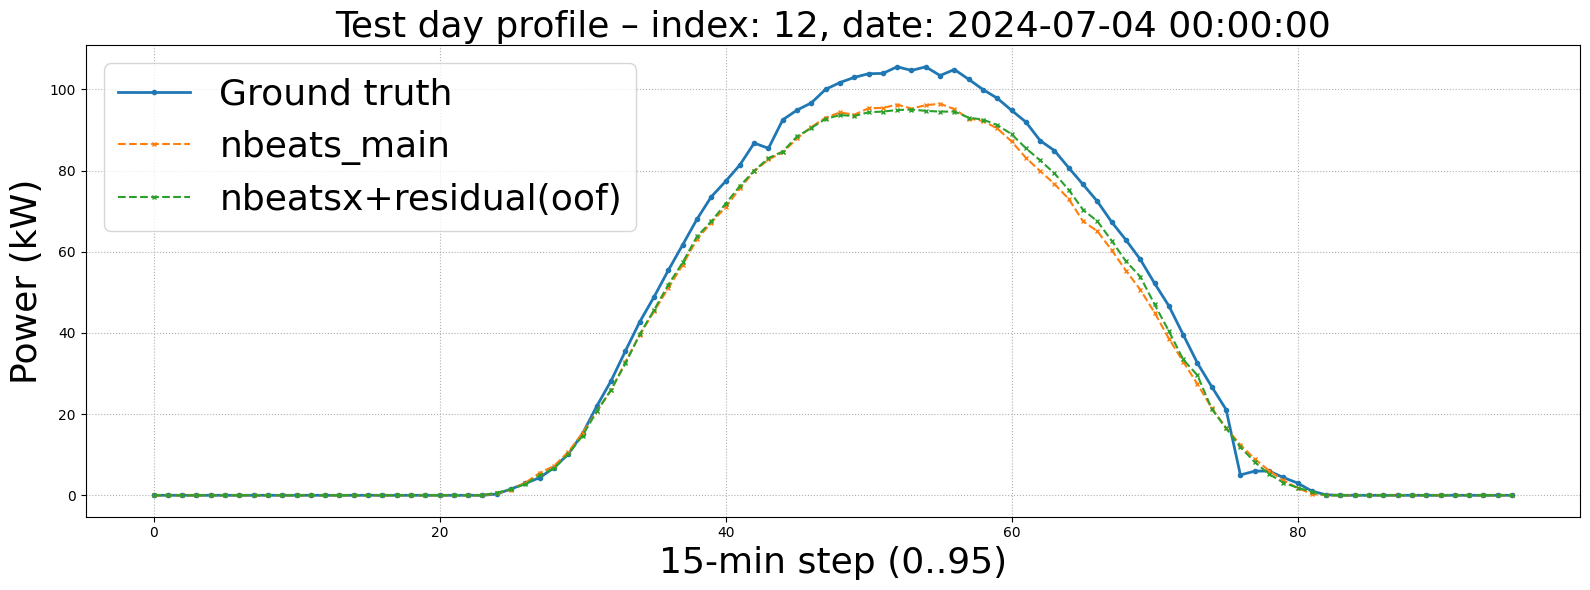

[Saved] Test day profile figure -> C:\Users\Admin\Desktop\Vedat\day_ahead_4models_outputs\figures\test_day_profile_DAYAHEAD_20260127_192117_day12.png (+.pdf)


In [54]:
# ============================================================
# OUTPUT BLOCK (KOD-1 FORMAT) – NBEATS MAIN + NBEATSX+RESIDUAL(OOF)
#  - metrics csv (overall + daily)
#  - best_model json payload
#  - table fig (png+pdf)
#  - test day profile plot (GT + main (+ final))
# ============================================================

OUT_DIR_KOD1 = r"C:\Users\Admin\Desktop\Vedat\day_ahead_4models_outputs"
ARTIFACT_DIR_KOD1 = os.path.join(OUT_DIR_KOD1, "artifacts")
FIG_DIR_KOD1 = os.path.join(OUT_DIR_KOD1, "figures")
os.makedirs(OUT_DIR_KOD1, exist_ok=True)
os.makedirs(ARTIFACT_DIR_KOD1, exist_ok=True)
os.makedirs(FIG_DIR_KOD1, exist_ok=True)

RUN_ID_SAFE = globals().get("RUN_ID", datetime.now().strftime("%Y%m%d_%H%M%S"))

# KOD-1 formatında dışarıya görünecek model isimleri (etiket)
NAME_NBEATS_MAIN = "nbeats_main"
NAME_NBEATSX_RESID_OOF = "nbeatsx+residual(oof)"

PREFIX = f"DAYAHEAD_{RUN_ID_SAFE}"  # daha nötr, iki satırı da kapsar

# -------------------------
# Arrays (TEST)
# -------------------------
Y_TRUE_TEST = np.asarray(y_test_orig_day).squeeze(-1)  # (N,96)

# MAIN tahmin:
# - Eğer ayrı bir NBEATS main modeliniz varsa, onun postprocess edilmiş test tahminini
#   y_test_pred_nbeats_main_post gibi bir değişkene koyup burada kullanın.
# - Yoksa fallback olarak bu scriptin base tahmini kullanılır: y_test_pred_post
Y_PRED_MAIN = np.asarray(globals().get("y_test_pred_nbeats_main_post", y_test_pred_post)).squeeze(-1)  # (N,96)

# residual enabled?
res_meta = globals().get("residual_meta", {"enabled": False})
RESIDUAL_ENABLED = bool(res_meta.get("enabled", False))

Y_PRED_FINAL = None
if RESIDUAL_ENABLED:
    Y_PRED_FINAL = np.asarray(y_test_pred_final).squeeze(-1)  # (N,96)

M_TEST_DAY = globals().get("m_test_day", None)

# -------------------------
# Metrics helpers assumed available:
# compute_overall_metrics, compute_daily_metrics
# -------------------------
def _metrics_row(model_name, yhat_2d, mask_day_2d):
    m_all = compute_overall_metrics(Y_TRUE_TEST, yhat_2d, mask=None)
    m_day = compute_overall_metrics(Y_TRUE_TEST, yhat_2d, mask=mask_day_2d) if (globals().get("REPORT_DAYLIGHT_METRICS", False) and mask_day_2d is not None) else None

    row = dict(m_all)
    row.update({
        "MSE_day":  float(m_day["MSE"])  if isinstance(m_day, dict) else np.nan,
        "RMSE_day": float(m_day["RMSE"]) if isinstance(m_day, dict) else np.nan,
        "MAE_day":  float(m_day["MAE"])  if isinstance(m_day, dict) else np.nan,
        "R2_day":   float(m_day["R2"])   if isinstance(m_day, dict) else np.nan,
        "model": model_name
    })
    return row

summary_rows = []
summary_rows.append(_metrics_row(NAME_NBEATS_MAIN, Y_PRED_MAIN, M_TEST_DAY))
if RESIDUAL_ENABLED:
    summary_rows.append(_metrics_row(NAME_NBEATSX_RESID_OOF, Y_PRED_FINAL, M_TEST_DAY))

summary_df_k1fmt = (
    pd.DataFrame(summary_rows)
      .set_index("model")
      .sort_values("RMSE")  # ALL timesteps, post-processed
)

print("\n======================================")
print("TEST METRICS (KOD-1 FORMAT) [POST-PROCESSED]")
print("======================================")
print(summary_df_k1fmt)

summary_path_k1 = os.path.join(OUT_DIR_KOD1, f"metrics_overall_{PREFIX}.csv")
summary_df_k1fmt.to_csv(summary_path_k1)
print(f"[Saved] Overall metrics -> {summary_path_k1}")

BEST_MODEL_NAME = summary_df_k1fmt.index[0]
print(f"[Best] {BEST_MODEL_NAME}")

best_payload_k1 = {
    "best_model_name": BEST_MODEL_NAME,
    "run_id": RUN_ID_SAFE,
    "models_in_block": [NAME_NBEATS_MAIN] + ([NAME_NBEATSX_RESID_OOF] if RESIDUAL_ENABLED else []),
    "sorted_by": "RMSE (ALL timesteps, post-processed)",
    "horizon": int(globals().get("HORIZON_H", 96)),
    "daylight_weight": float(globals().get("DAYLIGHT_WEIGHT", 3.0)),
    "report_daylight_metrics": bool(globals().get("REPORT_DAYLIGHT_METRICS", False)),
    "postprocess": {
        "clip_negative": bool(globals().get("CLIP_NEGATIVE", True)),
        "night_zero": bool(globals().get("NIGHT_ZERO", True)),
        "capacity_kw": globals().get("CAPACITY_KW", None),
    },
    "residual_meta": res_meta,
    # İsterseniz hangi değişkenlerin kullanıldığına dair iz:
    "var_map": {
        "y_true_test": "y_test_orig_day",
        "y_pred_main": "y_test_pred_nbeats_main_post (if exists) else y_test_pred_post",
        "y_pred_final": "y_test_pred_final (if residual enabled)"
    }
}
best_path_k1 = os.path.join(ARTIFACT_DIR_KOD1, f"best_model_{PREFIX}.json")
with open(best_path_k1, "w", encoding="utf-8") as f:
    json.dump(best_payload_k1, f, ensure_ascii=False, indent=2)
print(f"[Saved] Best model payload -> {best_path_k1}")

# -------------------------
# Daily metrics
# -------------------------
daily_main_df = compute_daily_metrics(d_test, Y_TRUE_TEST, Y_PRED_MAIN)
daily_main_path = os.path.join(OUT_DIR_KOD1, f"metrics_daily_{PREFIX}_{NAME_NBEATS_MAIN}.csv")
daily_main_df.to_csv(daily_main_path)
print(f"[Saved] Daily metrics (main) -> {daily_main_path}")

if RESIDUAL_ENABLED:
    daily_final_df = compute_daily_metrics(d_test, Y_TRUE_TEST, Y_PRED_FINAL)
    daily_final_path = os.path.join(OUT_DIR_KOD1, f"metrics_daily_{PREFIX}_{NAME_NBEATSX_RESID_OOF}.csv")
    daily_final_df.to_csv(daily_final_path)
    print(f"[Saved] Daily metrics (final) -> {daily_final_path}")

# -------------------------
# Save table figure (png+pdf)
# -------------------------
def _save_df_as_table_figure(df, title, fig_dir, fname, round_n=3):
    df2 = df.copy()
    try:
        df2 = df2.round(int(round_n))
    except Exception:
        pass

    fig_h = max(2.5, 0.45 * (df2.shape[0] + 1))
    fig_w = max(10.0, 1.25 * (df2.shape[1] + 1))

    fig, ax = plt.subplots(figsize=(fig_w, fig_h))
    ax.axis("off")
    ax.set_title(title, fontsize=12, pad=12)

    tbl = ax.table(
        cellText=df2.values,
        rowLabels=df2.index.astype(str).tolist(),
        colLabels=df2.columns.astype(str).tolist(),
        loc="center"
    )
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(9)
    tbl.scale(1.0, 1.25)

    png_path = os.path.join(fig_dir, f"{fname}.png")
    pdf_path = os.path.join(fig_dir, f"{fname}.pdf")
    fig.tight_layout()
    fig.savefig(png_path, dpi=300, bbox_inches="tight")
    fig.savefig(pdf_path, dpi=300, bbox_inches="tight")
    plt.close(fig)
    print(f"[Saved] Table figure -> {png_path} (+.pdf)")

_save_df_as_table_figure(
    summary_df_k1fmt,
    title=f"Overall Test Metrics – Post-Processed (RUN_ID={RUN_ID_SAFE})",
    fig_dir=FIG_DIR_KOD1,
    fname=f"table_metrics_overall_{PREFIX}",
    round_n=3
)

# -------------------------
# Plot test-day profile + save (GT + main (+ final))
# -------------------------
def plot_test_day_multi_and_save(day_no, d_test, Y_true_2d, preds_dict_2d, fig_dir, prefix):
    unique_days = np.unique(d_test)
    if day_no < 1 or day_no > len(unique_days):
        print(f"Invalid day_no={day_no}. There are {len(unique_days)} unique test days.")
        return

    day_label = unique_days[day_no - 1]
    idxs = np.where(d_test == day_label)[0]
    y_true = np.asarray(Y_true_2d)[idxs].reshape(-1)

    fig = plt.figure(figsize=(16, 6))
    plt.plot(y_true, label="Ground truth", marker="o", ms=3, linewidth=2)

    for name, arr in preds_dict_2d.items():
        y_pred = np.asarray(arr)[idxs].reshape(-1)
        plt.plot(y_pred, label=name, linestyle="--", marker="x", ms=3)

    plt.title(f"Test day profile – index: {day_no}, date: {day_label}", fontsize=26)
    plt.xlabel("15-min step (0..95)",fontsize=26)
    plt.ylabel("Power (kW)",fontsize=26)
    plt.grid(True, linestyle=":")
    plt.legend(fontsize=26)
    plt.tight_layout()

    png_path = os.path.join(fig_dir, f"test_day_profile_{prefix}_day{day_no}.png")
    pdf_path = os.path.join(fig_dir, f"test_day_profile_{prefix}_day{day_no}.pdf")
    fig.savefig(png_path, dpi=300, bbox_inches="tight")
    fig.savefig(pdf_path, dpi=300, bbox_inches="tight")
    plt.show()
    plt.close(fig)
    print(f"[Saved] Test day profile figure -> {png_path} (+.pdf)")

preds_for_plot = {NAME_NBEATS_MAIN: Y_PRED_MAIN}
if RESIDUAL_ENABLED:
    preds_for_plot[NAME_NBEATSX_RESID_OOF] = Y_PRED_FINAL

plot_test_day_multi_and_save(
    day_no=12,
    d_test=d_test,
    Y_true_2d=Y_TRUE_TEST,
    preds_dict_2d=preds_for_plot,
    fig_dir=FIG_DIR_KOD1,
    prefix=PREFIX
)


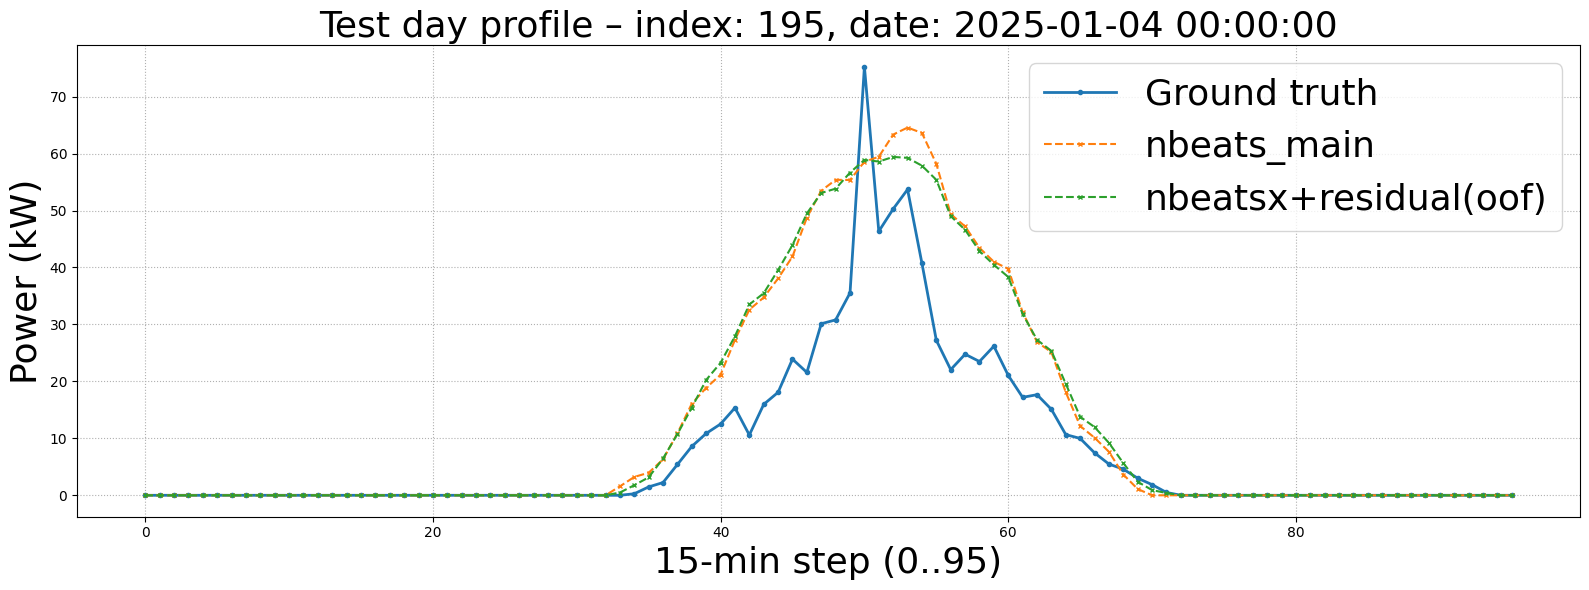

[Saved] Test day profile figure -> C:\Users\Admin\Desktop\Vedat\day_ahead_4models_outputs\figures\test_day_profile_DAYAHEAD_20260127_192117_day195.png (+.pdf)


In [59]:
plot_test_day_multi_and_save(
    day_no=195,
    d_test=d_test,
    Y_true_2d=Y_TRUE_TEST,
    preds_dict_2d=preds_for_plot,
    fig_dir=FIG_DIR_KOD1,
    prefix=PREFIX
)


TEST METRICS (KOD-1 FORMAT) [POST-PROCESSED]
                             MSE      RMSE       MAE        R2     MSE_day  \
model                                                                        
nbeatsx+residual(oof)  94.295486  9.710586  3.950398  0.916350  190.456955   
nbeats_main            94.718216  9.732328  4.129813  0.915975  191.310822   

                        RMSE_day   MAE_day    R2_day  
model                                                 
nbeatsx+residual(oof)  13.800614  7.969770  0.837432  
nbeats_main            13.831516  8.332164  0.836703  
[Saved] Overall metrics -> C:\Users\Admin\Desktop\Vedat\day_ahead_4models_outputs\metrics_overall_DAYAHEAD_20260127_192117.csv
[Best] nbeatsx+residual(oof)
[Saved] Best model payload -> C:\Users\Admin\Desktop\Vedat\day_ahead_4models_outputs\artifacts\best_model_DAYAHEAD_20260127_192117.json
[Saved] Daily metrics (main) -> C:\Users\Admin\Desktop\Vedat\day_ahead_4models_outputs\metrics_daily_DAYAHEAD_20260127_192117_nbe

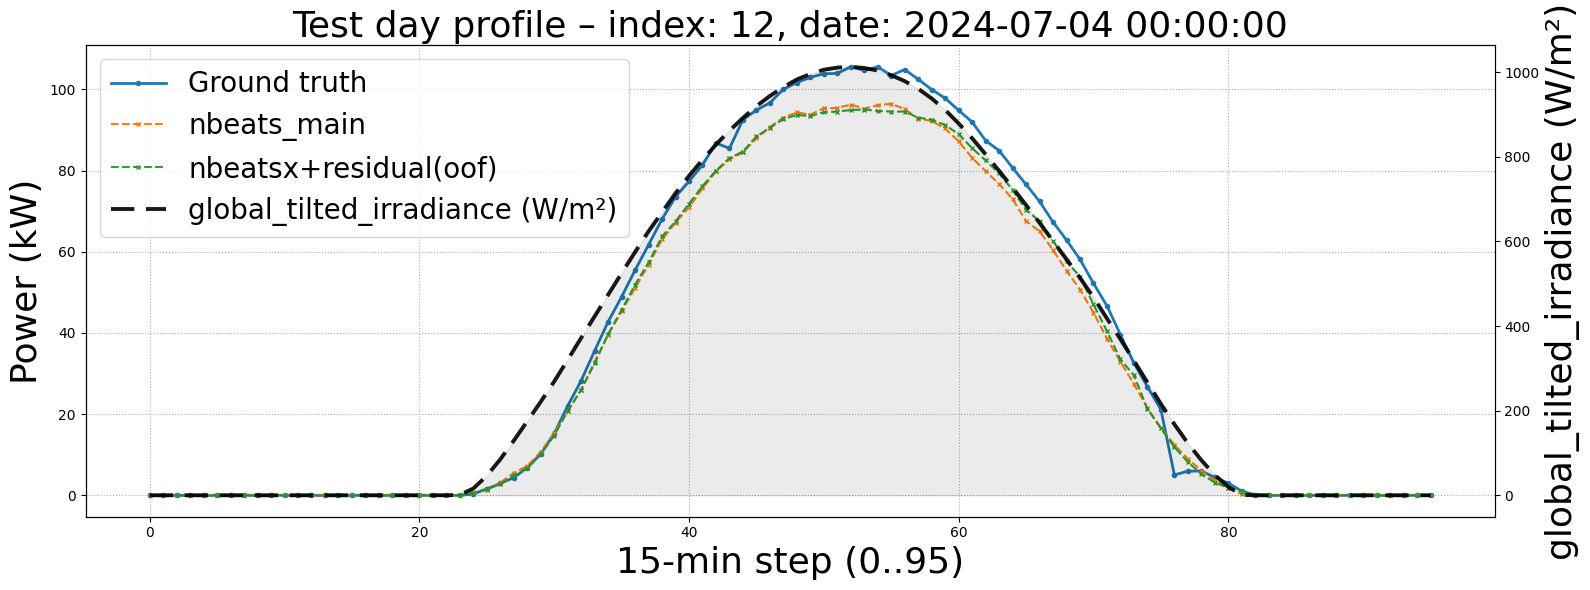

[Saved] Test day profile figure -> C:\Users\Admin\Desktop\Vedat\day_ahead_4models_outputs\figures\test_day_profile_DAYAHEAD_20260127_192117_day12.png (+.pdf)


In [60]:
# ============================================================
# OUTPUT BLOCK (KOD-1 FORMAT) – NBEATS MAIN + NBEATSX+RESIDUAL(OOF)
#  - metrics csv (overall + daily)
#  - best_model json payload
#  - table fig (png+pdf)
#  - test day profile plot (GT + main (+ final))
#
#  REVISION (Classic-ML bloktaki ile AYNI işlem):
#   ✅ gti_name="global_tilted_irradiance (W/m²)"
#   ✅ GTI'yi robust şekilde yükle/çıkar -> gti_test_2d (N,96)
#      - gti_test_2d global varsa onu kullanır
#      - X_test_3d / X_test + feature_names içinden bulmayı dener
#      - df_test içinden (datetime kolonu veya DatetimeIndex) bulup d_test ile hizalar
#      - Manual override destekler: DT_COL, GTI_COL
#   ✅ Plot: Power (kW) sol eksen, GTI (W/m²) sağ eksen (fill + dashed), tek legend
# ============================================================

import os
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# -------------------------
# Robust helpers (GTI)
# -------------------------
def _get_first_global(names):
    for n in names:
        if n in globals() and globals()[n] is not None:
            return globals()[n], n
    return None, None

def _day_key(val):
    """Normalize any day-like label to stable key (YYYY-MM-DD if parseable)."""
    try:
        ts = pd.to_datetime(val, errors="raise")
        return ts.strftime("%Y-%m-%d")
    except Exception:
        return str(val)

def _find_gti_column(df: pd.DataFrame, preferred: str = None):
    if df is None or df.empty:
        return None

    if preferred and preferred in df.columns:
        return preferred

    gti_candidates = [
        "global_tilted_irradiance (W/m²)",
        "global_tilted_irradiance (W/m2)",
        "global_tilted_irradiance",
        "gti",
        "GTI",
    ]

    cols_lower_map = {str(c).lower(): c for c in df.columns}
    for c in gti_candidates:
        if str(c).lower() in cols_lower_map:
            return cols_lower_map[str(c).lower()]

    # substring heuristics
    for c in df.columns:
        cl = str(c).lower()
        if "global_tilted_irradiance" in cl:
            return c
        if ("tilted" in cl and "irradiance" in cl):
            return c
        if "gti" in cl:
            return c
        # optional solar synonyms
        if ("poa" in cl and "irradiance" in cl):
            return c

    return None

def _find_datetime_series(df: pd.DataFrame, preferred: str = None):
    """
    Returns (dt_series, dt_source_name) or (None, None).
    Supports:
      - DatetimeIndex
      - explicit preferred column
      - common datetime column names (case-insensitive)
      - datetime dtype columns
      - heuristic parse of string/object columns with date/time keywords
    """
    if df is None or df.empty:
        return None, None

    # 1) datetime in index
    if isinstance(df.index, pd.DatetimeIndex):
        return df.index.to_series(), "<index:DatetimeIndex>"

    # 2) preferred override
    if preferred and preferred in df.columns:
        s = pd.to_datetime(df[preferred], errors="coerce")
        if float(s.notna().mean()) >= 0.80:
            return s, preferred

    # 3) common name candidates
    name_candidates = [
        "ds", "datetime", "timestamp", "time", "date_time",
        "date", "dt", "tarih", "zaman",
        "local_time", "utc_time", "datetime_local", "datetime_utc",
    ]
    for cand in name_candidates:
        for col in df.columns:
            if str(col).lower() == cand:
                s = pd.to_datetime(df[col], errors="coerce")
                if float(s.notna().mean()) >= 0.80:
                    return s, col

    # 4) datetime dtype columns
    for col in df.columns:
        try:
            if np.issubdtype(df[col].dtype, np.datetime64):
                s = pd.to_datetime(df[col], errors="coerce")
                if float(s.notna().mean()) >= 0.80:
                    return s, col
        except Exception:
            pass

    # 5) heuristic parse: object/string cols with date/time keywords
    keyword_cols = []
    for col in df.columns:
        cl = str(col).lower()
        if any(k in cl for k in ["date", "time", "stamp", "ts", "datetime", "tarih", "zaman"]):
            keyword_cols.append(col)

    keyword_cols = [
        c for c in keyword_cols
        if (df[c].dtype == object) or ("string" in str(df[c].dtype).lower())
    ]

    best_col, best_s, best_ratio = None, None, 0.0
    for col in keyword_cols:
        s = pd.to_datetime(df[col], errors="coerce")
        ratio = float(s.notna().mean())
        if ratio > best_ratio:
            best_ratio, best_col, best_s = ratio, col, s

    if best_s is not None and best_ratio >= 0.80:
        return best_s, best_col

    return None, None

def _to_2d(arr):
    """Safely convert model arrays to (N,96) when possible."""
    a = np.asarray(arr)
    if a.ndim == 3 and a.shape[-1] == 1:
        a = a.squeeze(-1)
    return a


# ============================================================
# OUTPUT PATHS
# ============================================================
OUT_DIR_KOD1 = r"C:\Users\Admin\Desktop\Vedat\day_ahead_4models_outputs"
ARTIFACT_DIR_KOD1 = os.path.join(OUT_DIR_KOD1, "artifacts")
FIG_DIR_KOD1 = os.path.join(OUT_DIR_KOD1, "figures")
os.makedirs(OUT_DIR_KOD1, exist_ok=True)
os.makedirs(ARTIFACT_DIR_KOD1, exist_ok=True)
os.makedirs(FIG_DIR_KOD1, exist_ok=True)

RUN_ID_SAFE = globals().get("RUN_ID", datetime.now().strftime("%Y%m%d_%H%M%S"))

# KOD-1 formatında dışarıya görünecek model isimleri (etiket)
NAME_NBEATS_MAIN = "nbeats_main"
NAME_NBEATSX_RESID_OOF = "nbeatsx+residual(oof)"

PREFIX = f"DAYAHEAD_{RUN_ID_SAFE}"  # daha nötr, iki satırı da kapsar

# -------------------------
# Arrays (TEST)
# -------------------------
Y_TRUE_TEST = _to_2d(y_test_orig_day)  # expected (N,96)

# MAIN tahmin (fallback: y_test_pred_post)
Y_PRED_MAIN = _to_2d(globals().get("y_test_pred_nbeats_main_post", globals().get("y_test_pred_post", None)))
if Y_PRED_MAIN is None:
    raise ValueError("Missing prediction for MAIN: expected 'y_test_pred_nbeats_main_post' or 'y_test_pred_post' in globals().")

# residual enabled?
res_meta = globals().get("residual_meta", {"enabled": False})
RESIDUAL_ENABLED = bool(res_meta.get("enabled", False))

Y_PRED_FINAL = None
if RESIDUAL_ENABLED:
    Y_PRED_FINAL = _to_2d(globals().get("y_test_pred_final", None))
    if Y_PRED_FINAL is None:
        raise ValueError("RESIDUAL_ENABLED=True but 'y_test_pred_final' is missing in globals().")

M_TEST_DAY = globals().get("m_test_day", None)  # (N,96) daylight mask

# -------------------------
# Metrics helpers assumed available:
# compute_overall_metrics, compute_daily_metrics
# -------------------------
def _metrics_row(model_name, yhat_2d, mask_day_2d):
    m_all = compute_overall_metrics(Y_TRUE_TEST, yhat_2d, mask=None)
    m_day = compute_overall_metrics(Y_TRUE_TEST, yhat_2d, mask=mask_day_2d) if (globals().get("REPORT_DAYLIGHT_METRICS", False) and mask_day_2d is not None) else None

    row = dict(m_all)
    row.update({
        "MSE_day":  float(m_day["MSE"])  if isinstance(m_day, dict) else np.nan,
        "RMSE_day": float(m_day["RMSE"]) if isinstance(m_day, dict) else np.nan,
        "MAE_day":  float(m_day["MAE"])  if isinstance(m_day, dict) else np.nan,
        "R2_day":   float(m_day["R2"])   if isinstance(m_day, dict) else np.nan,
        "model": model_name
    })
    return row

summary_rows = []
summary_rows.append(_metrics_row(NAME_NBEATS_MAIN, Y_PRED_MAIN, M_TEST_DAY))
if RESIDUAL_ENABLED:
    summary_rows.append(_metrics_row(NAME_NBEATSX_RESID_OOF, Y_PRED_FINAL, M_TEST_DAY))

summary_df_k1fmt = (
    pd.DataFrame(summary_rows)
      .set_index("model")
      .sort_values("RMSE")  # ALL timesteps, post-processed
)

print("\n======================================")
print("TEST METRICS (KOD-1 FORMAT) [POST-PROCESSED]")
print("======================================")
print(summary_df_k1fmt)

summary_path_k1 = os.path.join(OUT_DIR_KOD1, f"metrics_overall_{PREFIX}.csv")
summary_df_k1fmt.to_csv(summary_path_k1)
print(f"[Saved] Overall metrics -> {summary_path_k1}")

BEST_MODEL_NAME = summary_df_k1fmt.index[0]
print(f"[Best] {BEST_MODEL_NAME}")

best_payload_k1 = {
    "best_model_name": BEST_MODEL_NAME,
    "run_id": RUN_ID_SAFE,
    "models_in_block": [NAME_NBEATS_MAIN] + ([NAME_NBEATSX_RESID_OOF] if RESIDUAL_ENABLED else []),
    "sorted_by": "RMSE (ALL timesteps, post-processed)",
    "horizon": int(globals().get("HORIZON_H", 96)),
    "daylight_weight": float(globals().get("DAYLIGHT_WEIGHT", 3.0)),
    "report_daylight_metrics": bool(globals().get("REPORT_DAYLIGHT_METRICS", False)),
    "postprocess": {
        "clip_negative": bool(globals().get("CLIP_NEGATIVE", True)),
        "night_zero": bool(globals().get("NIGHT_ZERO", True)),
        "capacity_kw": globals().get("CAPACITY_KW", None),
    },
    "residual_meta": res_meta,
    "var_map": {
        "y_true_test": "y_test_orig_day",
        "y_pred_main": "y_test_pred_nbeats_main_post (if exists) else y_test_pred_post",
        "y_pred_final": "y_test_pred_final (if residual enabled)"
    }
}
best_path_k1 = os.path.join(ARTIFACT_DIR_KOD1, f"best_model_{PREFIX}.json")
with open(best_path_k1, "w", encoding="utf-8") as f:
    json.dump(best_payload_k1, f, ensure_ascii=False, indent=2)
print(f"[Saved] Best model payload -> {best_path_k1}")

# -------------------------
# Daily metrics
# -------------------------
daily_main_df = compute_daily_metrics(d_test, Y_TRUE_TEST, Y_PRED_MAIN)
daily_main_path = os.path.join(OUT_DIR_KOD1, f"metrics_daily_{PREFIX}_{NAME_NBEATS_MAIN}.csv")
daily_main_df.to_csv(daily_main_path)
print(f"[Saved] Daily metrics (main) -> {daily_main_path}")

if RESIDUAL_ENABLED:
    daily_final_df = compute_daily_metrics(d_test, Y_TRUE_TEST, Y_PRED_FINAL)
    daily_final_path = os.path.join(OUT_DIR_KOD1, f"metrics_daily_{PREFIX}_{NAME_NBEATSX_RESID_OOF}.csv")
    daily_final_df.to_csv(daily_final_path)
    print(f"[Saved] Daily metrics (final) -> {daily_final_path}")

# -------------------------
# Save table figure (png+pdf)
# -------------------------
def _save_df_as_table_figure(df, title, fig_dir, fname, round_n=3):
    df2 = df.copy()
    try:
        df2 = df2.round(int(round_n))
    except Exception:
        pass

    fig_h = max(2.5, 0.45 * (df2.shape[0] + 1))
    fig_w = max(10.0, 1.25 * (df2.shape[1] + 1))

    fig, ax = plt.subplots(figsize=(fig_w, fig_h))
    ax.axis("off")
    ax.set_title(title, fontsize=12, pad=12)

    tbl = ax.table(
        cellText=df2.values,
        rowLabels=df2.index.astype(str).tolist(),
        colLabels=df2.columns.astype(str).tolist(),
        loc="center"
    )
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(9)
    tbl.scale(1.0, 1.25)

    png_path = os.path.join(fig_dir, f"{fname}.png")
    pdf_path = os.path.join(fig_dir, f"{fname}.pdf")
    fig.tight_layout()
    fig.savefig(png_path, dpi=300, bbox_inches="tight")
    fig.savefig(pdf_path, dpi=300, bbox_inches="tight")
    plt.close(fig)
    print(f"[Saved] Table figure -> {png_path} (+.pdf)")

_save_df_as_table_figure(
    summary_df_k1fmt,
    title=f"Overall Test Metrics – Post-Processed (RUN_ID={RUN_ID_SAFE})",
    fig_dir=FIG_DIR_KOD1,
    fname=f"table_metrics_overall_{PREFIX}",
    round_n=3
)

# ============================================================
# GTI PREP (N,96) – Robust extraction + optional alignment to d_test
# ============================================================
gti_test_2d = globals().get("gti_test_2d", None)

DT_COL_OVERRIDE = globals().get("DT_COL", None)   # optional manual override
GTI_COL_OVERRIDE = globals().get("GTI_COL", None) # optional manual override

if gti_test_2d is None:
    # 1) Try feature tensor/array (3D preferred)
    Xcand, Xname = _get_first_global([
        "X_test_3d", "X_test", "x_test", "X_te", "X_test_seq", "X_test_scaled", "X_test_final"
    ])
    Fcand, Fname = _get_first_global([
        "feature_names", "FEATURE_NAMES", "feature_cols", "FEATURE_COLS",
        "selected_features", "SELECTED_FEATURES"
    ])

    if Fcand is not None and not isinstance(Fcand, (list, tuple)):
        try:
            Fcand = list(Fcand)
        except Exception:
            pass

    gti_candidates = [
        "global_tilted_irradiance (W/m²)",
        "global_tilted_irradiance (W/m2)",
        "global_tilted_irradiance",
        "gti",
        "GTI",
    ]

    if (Xcand is not None) and (Fcand is not None):
        X = np.asarray(Xcand)
        feature_names = list(Fcand)

        gti_idx = None
        for c in gti_candidates:
            if c in feature_names:
                gti_idx = feature_names.index(c)
                break

        if gti_idx is None:
            print(f"[Warn] GTI feature not found in {Fname}. Example features: {feature_names[:10]}")
        else:
            if X.ndim == 3:
                # assumes (N,96,F)
                gti_test_2d = X[:, :, gti_idx]
                print(f"[Info] GTI extracted from {Xname} (3D) using '{feature_names[gti_idx]}' (idx={gti_idx})")
            elif X.ndim == 2:
                # attempt reshape if (N, 96*F)
                N = X.shape[0]
                if X.shape[1] % 96 == 0:
                    F = X.shape[1] // 96
                    if gti_idx < F:
                        X3 = X.reshape(N, 96, F)
                        gti_test_2d = X3[:, :, gti_idx]
                        print(f"[Info] GTI extracted from {Xname} (2D->3D reshape) using '{feature_names[gti_idx]}'")
                    else:
                        print(f"[Warn] gti_idx={gti_idx} >= F={F} after reshape. Check feature ordering.")
                else:
                    print(f"[Warn] {Xname} is 2D but not divisible by 96 -> cannot reshape safely. Shape={X.shape}")
            else:
                print(f"[Warn] {Xname} unexpected ndim={X.ndim}. Shape={X.shape}")

    # 2) Fallback: build from df_test (15-min rows) and ALIGN to d_test
    if gti_test_2d is None:
        dfcand, dfname = _get_first_global([
            "df_test", "test_df", "df_te", "df_test_15min", "df_test_15m", "df_test_15"
        ])
        if dfcand is not None:
            df_test = dfcand.copy()

            gti_col = _find_gti_column(df_test, preferred=GTI_COL_OVERRIDE)
            if gti_col is None:
                print(f"[Warn] {dfname} found but GTI column not found. Example columns: {list(df_test.columns)[:25]}")
            else:
                dt_series, dt_source = _find_datetime_series(df_test, preferred=DT_COL_OVERRIDE)

                if dt_series is None:
                    # last-resort: if df_test length matches N*96, reshape directly (assumes correct order)
                    N = len(d_test) if ("d_test" in globals() and d_test is not None) else None
                    if N is not None and len(df_test) == N * 96:
                        arr = df_test[gti_col].to_numpy()
                        gti_test_2d = arr.reshape(N, 96)
                        print(f"[Info] GTI built by reshape from {dfname}[{gti_col}] -> shape={gti_test_2d.shape} (no datetime needed)")
                    else:
                        print(f"[Warn] {dfname} found but datetime not detected; cannot align/build GTI safely.")
                        print("       -> You can set overrides: DT_COL='your_datetime_col' and/or GTI_COL='your_gti_col'")
                else:
                    dt_series = pd.to_datetime(dt_series, errors="coerce")
                    ok_ratio = float(dt_series.notna().mean())
                    if ok_ratio < 0.80:
                        print(f"[Warn] Detected datetime source {dt_source} but parse success is low ({ok_ratio:.2%}).")
                        print("       -> Set DT_COL manually (DT_COL='...') if needed.")
                    else:
                        df_tmp = df_test.copy()
                        df_tmp["__dt__"] = dt_series
                        df_tmp = df_tmp.dropna(subset=["__dt__"]).sort_values("__dt__")
                        df_tmp["__day__"] = df_tmp["__dt__"].dt.floor("D")

                        # day -> 96 vector map
                        gti_map = {}
                        for day, g in df_tmp.groupby("__day__"):
                            g = g.sort_values("__dt__")
                            arr = g[gti_col].to_numpy()
                            if len(arr) >= 96:
                                gti_map[_day_key(day)] = arr[:96]

                        # align to d_test samples
                        d_keys = [_day_key(x) for x in d_test]
                        gti_aligned = np.full((len(d_keys), 96), np.nan, dtype=float)

                        miss = 0
                        for i, k in enumerate(d_keys):
                            vec = gti_map.get(k, None)
                            if vec is not None:
                                gti_aligned[i, :] = vec
                            else:
                                miss += 1

                        gti_test_2d = gti_aligned
                        print(f"[Info] GTI built from {dfname}[{gti_col}] using datetime {dt_source} -> shape={gti_test_2d.shape}")
                        if miss > 0:
                            print(f"[Warn] GTI missing for {miss}/{len(d_keys)} test days (filled with NaN).")

if gti_test_2d is None:
    print("[Info] GTI still not available -> plotting WITHOUT GTI.")
else:
    arr = np.asarray(gti_test_2d)
    if arr.ndim != 2 or arr.shape[1] != 96:
        print(f"[Warn] gti_test_2d shape unexpected: {arr.shape} (expected (N,96))")

# ============================================================
# Plot test-day profile + save (GT + main (+ final) + optional GTI)
# ============================================================
def plot_test_day_multi_and_save(
    day_no,
    d_test,
    Y_true_2d,
    preds_dict_2d,
    fig_dir,
    prefix,
    gti_test_2d=None,  # (N,96) optional
    gti_name="global_tilted_irradiance (W/m²)",
):
    unique_days = np.unique(d_test)
    if day_no < 1 or day_no > len(unique_days):
        print(f"Invalid day_no={day_no}. There are {len(unique_days)} unique test days.")
        return

    day_label = unique_days[day_no - 1]
    idxs = np.where(d_test == day_label)[0]
    if len(idxs) == 0:
        print(f"No sample found for day {day_label}.")
        return

    y_true = np.asarray(Y_true_2d)[idxs].reshape(-1)

    fig, ax1 = plt.subplots(figsize=(16, 6))

    # Power (kW) – left axis
    ax1.plot(y_true, label="Ground truth", marker="o", ms=3, linewidth=2)

    for name, arr in preds_dict_2d.items():
        y_pred = np.asarray(arr)[idxs].reshape(-1)
        ax1.plot(y_pred, label=name, linestyle="--", marker="x", ms=3)

    ax1.set_title(f"Test day profile – index: {day_no}, date: {day_label}", fontsize=26)
    ax1.set_xlabel("15-min step (0..95)", fontsize=26)
    ax1.set_ylabel("Power (kW)", fontsize=26)
    ax1.grid(True, linestyle=":")

    # GTI (W/m²) – right axis (optional)
    ax2 = None
    if gti_test_2d is not None:
        gti_day = np.asarray(gti_test_2d)[idxs].reshape(-1)
        if np.all(np.isnan(gti_day)):
            print("[Warn] GTI matrix exists but this day has no GTI values -> plotting WITHOUT GTI overlay for this day.")
        else:
            ax2 = ax1.twinx()
            x = np.arange(len(gti_day))

            ax2.fill_between(
                x, 0, gti_day,
                color="black",
                alpha=0.08,
                zorder=0
            )
            ax2.plot(
                gti_day,
                label=gti_name,
                color="black",
                linestyle=(0, (6, 3)),
                linewidth=2.8,
                alpha=0.9,
                zorder=1
            )
            ax2.set_ylabel(gti_name, fontsize=26)
            ax2.tick_params(axis="y", colors="black")
            ax2.spines["right"].set_color("black")

    # combined legend
    h1, l1 = ax1.get_legend_handles_labels()
    if ax2 is not None:
        h2, l2 = ax2.get_legend_handles_labels()
        ax1.legend(h1 + h2, l1 + l2, fontsize=20, loc="best")
    else:
        ax1.legend(fontsize=20, loc="best")

    fig.tight_layout()

    png_path = os.path.join(fig_dir, f"test_day_profile_{prefix}_day{day_no}.png")
    pdf_path = os.path.join(fig_dir, f"test_day_profile_{prefix}_day{day_no}.pdf")
    fig.savefig(png_path, dpi=300, bbox_inches="tight")
    fig.savefig(pdf_path, dpi=300, bbox_inches="tight")
    plt.show()
    plt.close(fig)
    print(f"[Saved] Test day profile figure -> {png_path} (+.pdf)")

preds_for_plot = {NAME_NBEATS_MAIN: Y_PRED_MAIN}
if RESIDUAL_ENABLED:
    preds_for_plot[NAME_NBEATSX_RESID_OOF] = Y_PRED_FINAL

plot_test_day_multi_and_save(
    day_no=12,
    d_test=d_test,
    Y_true_2d=Y_TRUE_TEST,
    preds_dict_2d=preds_for_plot,
    fig_dir=FIG_DIR_KOD1,
    prefix=PREFIX,
    gti_test_2d=gti_test_2d,
    gti_name="global_tilted_irradiance (W/m²)",
)


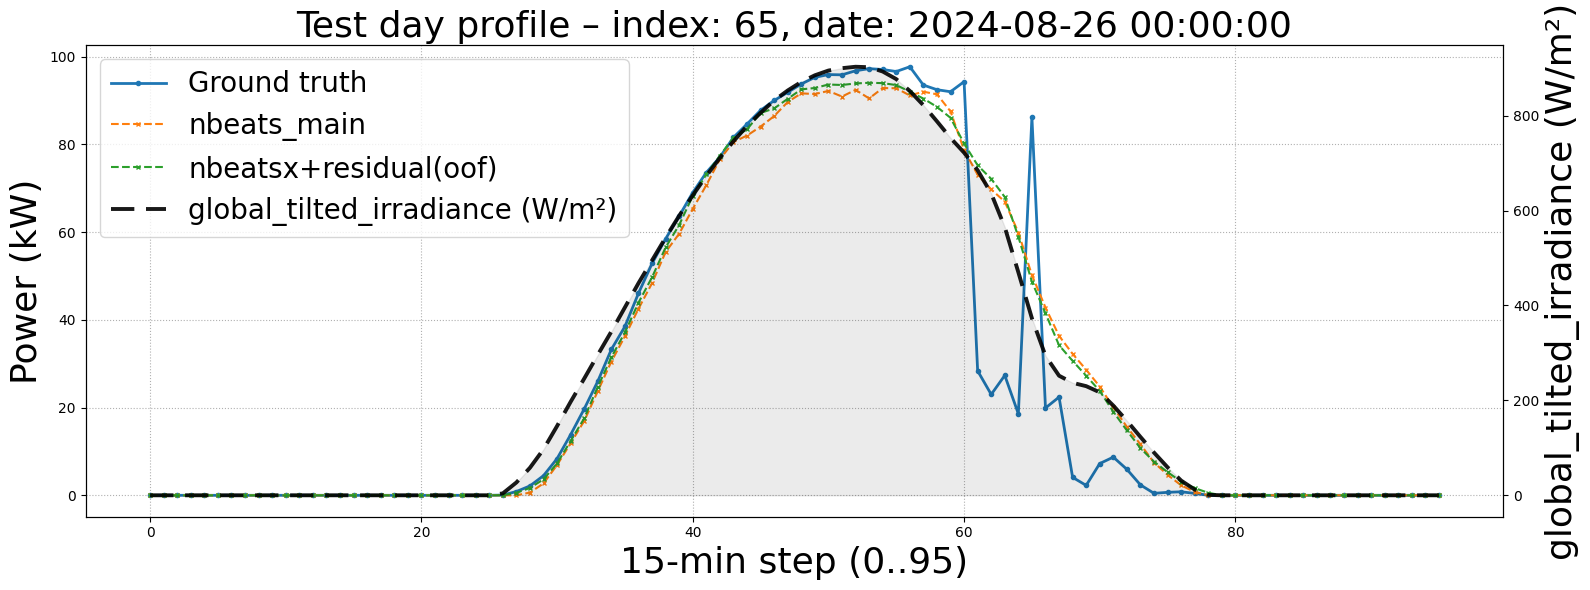

[Saved] Test day profile figure -> C:\Users\Admin\Desktop\Vedat\day_ahead_4models_outputs\figures\test_day_profile_DAYAHEAD_20260127_192117_day65.png (+.pdf)


In [77]:
plot_test_day_multi_and_save(
    day_no=65,
    d_test=d_test,
    Y_true_2d=Y_TRUE_TEST,
    preds_dict_2d=preds_for_plot,
    fig_dir=FIG_DIR_KOD1,
    prefix=PREFIX,
    gti_test_2d=gti_test_2d,
    gti_name="global_tilted_irradiance (W/m²)",
)

-----------------------------------